In [5]:
#Created by Oscar Scholin and Graham Hirsch Summer 2022
#n.b. we use 999999999 in lieu of np.nan since using the latter resulted in some errors in reading in csvs

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
from statistics import median, mean
import time

### Read in HCV csv

In [2]:
#set current working directory (cwd)
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/')

In [3]:
#call the dataframe from the hcv csv folder within the cwd
df = pd.read_csv(r'./raw data/hcv/HCV_7_1.csv')
df

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
0,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,55855.000881,25.631300,25.636757,0.1070,hst_12586_03_acs_wfc_f606w,False,55855.000881,1.093611,55855.000881,6.084347
1,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56001.959890,26.200701,26.195594,0.1815,hst_12586_10_acs_wfc_f606w,False,56001.959890,0.635000,56001.959890,2.961927
2,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56052.841962,26.034100,26.046429,0.1469,hst_12586_22_acs_wfc_f606w,False,56052.841962,0.824907,56052.841962,5.407275
3,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56109.701472,25.735399,25.760180,0.1854,hst_12586_35_acs_wfc_f606w,False,56109.701472,0.933519,56109.701472,4.572665
4,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56121.406559,25.626101,25.640382,0.0986,hst_12586_39_acs_wfc_f606w,False,56121.406559,1.029815,56121.406559,3.149204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576369,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56716.158792,20.118099,20.122682,0.0061,hst_13463_08_wfc3_uvis_f814w,False,56716.158792,1.415333,56716.158792,2.586158
2576370,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56732.954985,20.060400,20.060412,0.0058,hst_13463_12_wfc3_uvis_f814w,False,56732.954985,1.374222,56732.954985,6.504886
2576371,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56764.960344,20.134701,20.137863,0.0063,hst_13463_20_wfc3_uvis_f814w,False,56764.960344,1.420444,56764.960344,4.001287
2576372,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56784.897984,20.104401,20.095573,0.0057,hst_13463_24_wfc3_uvis_f814w,False,56784.897984,1.412222,56784.897984,3.657708


### Fake TDE

In [4]:
unique_matchids = df['matchid'].unique()

In [5]:
#get list of column names
col_names = list(df)
col_names

['matchid',
 'groupid',
 'subgroup',
 'ra',
 'dec',
 'pipeline_class',
 'expert_class',
 'filter',
 'num_filters',
 'var_quality_flag',
 'filter_detection_flag',
 'num_in_lc',
 'hsc_mean_mag',
 'hcv_mean_mag',
 'mad',
 'chi2',
 'lightcurve_d',
 'lightcurve_m',
 'lightcurve_cm',
 'lightcurve_e',
 'lightcurve_i',
 'lightcurve_r',
 'ci_d',
 'ci_v',
 'd_d',
 'd_v']

In [6]:
#define the time/mag of fake TDE
time = [-6, 0, 5, 24, 56, 62]
mag = [17.4, 17, 17.2, 19.2, 19.6, 20]
mag_err = [0.03, 0.05, 0.001, 0.001, 0.2, 0.1]

time_mag_magerr_list = list(zip(time, mag, mag_err))

#define other params needed for fake entry
matchid = 80087
#check to make sure that matchid isn't in the HCV already
print('is this matchid in the HCV?:' + str(matchid in unique_matchids))
print(time_mag_magerr_list)

is this matchid in the HCV?:False
[(-6, 17.4, 0.03), (0, 17, 0.05), (5, 17.2, 0.001), (24, 19.2, 0.001), (56, 19.6, 0.2), (62, 20, 0.1)]


In [7]:
#define rest of the params
groupid = 1033313
subgroup = 999999999
ra = 197.871282200 
dec = -1.346418497
pipeline_class = 999999999
expert_class = 999999999
filter_type = 'ACS_F606W'
num_filters = 1
var_quality_flag = 999999999
filter_detection_flag = 999999999
num_in_lc = len(time)
hsc_mean_mag = mean(mag)
hcv_mean_mag = mean(mag)
mad = 999999999
chi2 = 999999999
lightcurve_i = 'grahams_da_best'
lightcurve_r = 'FALSE'
ci_d = 999999999
ci_v = 999999999
d_d = 999999999
d_v = 999999999

#now define the rows of the fake dataframe
fake_df_data = {'matchid': [],
 'groupid': [],
 'subgroup': [],
 'ra': [],
 'dec': [],
 'pipeline_class': [],
 'expert_class': [],
 'filter': [],
 'num_filters': [],
 'var_quality_flag': [],
 'filter_detection_flag': [],
 'num_in_lc': [],
 'hsc_mean_mag': [],
 'hcv_mean_mag': [],
 'mad': [],
 'chi2': [],
 'lightcurve_d': [],
 'lightcurve_m': [],
 'lightcurve_cm': [],
 'lightcurve_e': [],
 'lightcurve_i': [],
 'lightcurve_r': [],
 'ci_d': [],
 'ci_v': [],
 'd_d': [],
 'd_v': []}
fake_df = pd.DataFrame(fake_df_data)

for time_mag_magerr in time_mag_magerr_list:
    fake_df = fake_df.append({
         'matchid': matchid,
         'groupid': groupid,
         'subgroup': subgroup,
         'ra': ra,
         'dec': dec,
         'pipeline_class':pipeline_class,
         'expert_class': expert_class,
         'filter':filter_type,
         'num_filters':num_filters,
         'var_quality_flag':var_quality_flag,
         'filter_detection_flag':filter_detection_flag,
         'num_in_lc': num_in_lc,
         'hsc_mean_mag': hsc_mean_mag,
         'hcv_mean_mag': hcv_mean_mag,
         'mad': mad,
         'chi2':chi2,
         'lightcurve_d': time_mag_magerr[0],
         'lightcurve_m': time_mag_magerr[1],
         'lightcurve_cm': time_mag_magerr[1],
         'lightcurve_e': time_mag_magerr[2],
         'lightcurve_i': lightcurve_i,
         'lightcurve_r': lightcurve_r,
         'ci_d':ci_d,
         'ci_v':ci_v,
         'd_d':d_d,
         'd_v':d_v
    }, ignore_index=True)
fake_df

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
0,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,-6.0,17.4,17.4,0.030,grahams_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
1,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,0.0,17.0,17.0,0.050,grahams_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
2,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,5.0,17.2,17.2,0.001,grahams_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
3,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,24.0,19.2,19.2,0.001,grahams_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
4,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,56.0,19.6,19.6,0.200,grahams_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
5,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,62.0,20.0,20.0,0.100,grahams_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0


In [8]:
#now append to the df
df = df.append(fake_df)
df

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
0,352.0,1040910.0,26.0,269.790894,-29.248819,1.0,0.0,ACS_F606W,2.0,AAAAC,...,55855.000881,25.631300,25.636757,0.1070,hst_12586_03_acs_wfc_f606w,False,5.585500e+04,1.093611e+00,5.585500e+04,6.084347e+00
1,352.0,1040910.0,26.0,269.790894,-29.248819,1.0,0.0,ACS_F606W,2.0,AAAAC,...,56001.959890,26.200701,26.195594,0.1815,hst_12586_10_acs_wfc_f606w,False,5.600196e+04,6.350000e-01,5.600196e+04,2.961927e+00
2,352.0,1040910.0,26.0,269.790894,-29.248819,1.0,0.0,ACS_F606W,2.0,AAAAC,...,56052.841962,26.034100,26.046429,0.1469,hst_12586_22_acs_wfc_f606w,False,5.605284e+04,8.249074e-01,5.605284e+04,5.407275e+00
3,352.0,1040910.0,26.0,269.790894,-29.248819,1.0,0.0,ACS_F606W,2.0,AAAAC,...,56109.701472,25.735399,25.760180,0.1854,hst_12586_35_acs_wfc_f606w,False,5.610970e+04,9.335186e-01,5.610970e+04,4.572665e+00
4,352.0,1040910.0,26.0,269.790894,-29.248819,1.0,0.0,ACS_F606W,2.0,AAAAC,...,56121.406559,25.626101,25.640382,0.0986,hst_12586_39_acs_wfc_f606w,False,5.612141e+04,1.029815e+00,5.612141e+04,3.149204e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,0.000000,17.000000,17.000000,0.0500,grahams_da_best,FALSE,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09
2,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,5.000000,17.200000,17.200000,0.0010,grahams_da_best,FALSE,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09
3,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,24.000000,19.200000,19.200000,0.0010,grahams_da_best,FALSE,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09
4,80087.0,1033313.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,56.000000,19.600000,19.600000,0.2000,grahams_da_best,FALSE,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09


### Lightcurve function

In [46]:
#plt.figure(figsize = (20, 10))

def make_lightcurve(matchid):
    #initialize list to hold list of time, mag tuples
    list_list_time_mag_magerr = []
    
    #create dataframe for given matchid
    matchid_df = df.loc[df['matchid']==matchid].reset_index()
    
    #get list of all filters
    filter_list = matchid_df['filter'].unique()
    
    #get list of colors
    prop_cycle = plt.rcParams['axes.prop_cycle']
    color_list = prop_cycle.by_key()['color']
    
    for filter_type in filter_list:
        #create a df for that matchid/filter combo
        filter_matchid_df = matchid_df.loc[matchid_df['filter']==filter_type]
        
        #stores list of list of tuples for each filter type, including magnitude and time
        time_mag_magerr_list =[]
        
        #now iterate through this dataframe and save the time, mag tuple to the time_mag_list
        for i in range(len(filter_matchid_df)):
            time_mag_magerr_list.append((filter_matchid_df['lightcurve_d'].values[i], 
                                  filter_matchid_df['lightcurve_m'].values[i],
                                  filter_matchid_df['lightcurve_e'].values[i]))
        
        list_list_time_mag_magerr.append(time_mag_magerr_list)
   
    #now plot!
    for i, list_time_mag_magerr in enumerate(list_list_time_mag_magerr):
        for time_mag_magerr in list_time_mag_magerr:
            plt.scatter(time_mag_magerr[0],time_mag_magerr[1])
            plt.errorbar(time_mag_magerr[0],time_mag_magerr[1], yerr=time_mag_magerr[2],
                        fmt = 'o', color = color_list[i])
        plt.xlabel('Time (Julian Days)', fontsize=16)
        plt.ylabel('Magnitude', fontsize=16)
        plt.title('Lightcurve for Matchid ' + str(matchid), fontsize=20)
        
    plt.gca().invert_yaxis() #invert y axis since magnitude is inverted; i.e. small magnitude is bright
    plt.legend(filter_list)
    plt.savefig('lightcurve_'+str(matchid)+'.jpeg')
    plt.show()

### Helper function to find variable filters

In [10]:
#takes in monster matrix; outputs list of unique filters that show max mag flare up, down
def find_variable_filters(matchid, monster_matrix):
    #get row corresponding to the input matchid
    matchid_monster_matrix = monster_matrix.loc[monster_matrix['matchid']==matchid]
    
    #initialize empty list
    variable_filters = []
    
    #find max max mag up, down filters and append
    max_max_mag_up_filter = matchid_monster_matrix['max max mag up filter'].values[0]
    max_max_mag_down_filter = matchid_monster_matrix['max max mag down filter'].values[0]
    
    #see if the filter is one of the filter types in the HCV; i.e. not nan
    #checking if the filter != 'NaN' or 'nan' or np.nan did not work
    filters = df['filter'].unique()
    
    if max_max_mag_up_filter in filters:
        variable_filters.append(max_max_mag_up_filter)
    if max_max_mag_down_filter in filters: 
        variable_filters.append(max_max_mag_down_filter)    
    #print(variable_filters)
    
    #find unique filters
    unique_filters = list(set(variable_filters))
    
    return unique_filters

### Lightcurve given list of max mag up, down filters

In [11]:
#takes in a matchid and list of filters that show variability
def make_lightcurve_variable_filters(matchid, variable_filters):
    #initialize list to hold list of time, mag tuples
    list_list_time_mag_magerr = []
    
    #create dataframe for given matchid
    matchid_df = df.loc[df['matchid']==matchid].reset_index()
    
    for filter_type in variable_filters:
        #create a df for that matchid/filter combo
        filter_matchid_df = matchid_df.loc[matchid_df['filter']==filter_type]
        
        #stores list of list of tuples for each filter type, including magnitude and time
        time_mag_magerr_list =[]
        
        #now iterate through this dataframe and save the time, mag tuple to the time_mag_list
        for i in range(len(filter_matchid_df)):
            time_mag_magerr_list.append((filter_matchid_df['lightcurve_d'].values[i], 
                                  filter_matchid_df['lightcurve_m'].values[i],
                                  filter_matchid_df['lightcurve_e'].values[i]))
        
        list_list_time_mag_magerr.append(time_mag_magerr_list)
   
    #now plot!
    for i, list_time_mag_magerr in enumerate(list_list_time_mag_magerr):
        for time_mag_magerr in list_time_mag_magerr:
            plt.scatter(time_mag_magerr[0],time_mag_magerr[1])
            plt.errorbar(time_mag_magerr[0],time_mag_magerr[1], yerr=time_mag_magerr[2],
                        fmt = 'o', color = 'blue')
        plt.xlabel('Time (Julian Days)', fontsize=16)
        plt.ylabel('Magnitude', fontsize=16)
        plt.title('Lightcurve for Matchid ' + str(matchid), fontsize=20)
        
    plt.gca().invert_yaxis() #invert y axis since magnitude is inverted; i.e. small magnitude is bright
    plt.legend(variable_filters)
    plt.savefig('lightcurve_'+str(matchid)+'.jpeg')
    plt.show()

### Feature Vector p1 helper functions

In [12]:
#function to convert ra and dec to galactic coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord

#takes in ra and dec in degrees and returns galatic coordinates
def ra_dec_to_galactic(wx, wy):
    c = SkyCoord(ra=wx*u.degree, dec=wy*u.degree, frame='icrs')
    
    #returns galatic longitude, galactic latitude
    return c.galactic.l.deg, c.galactic.b.deg

def get_list_matchids_groupid(groupid):
    #dataframe for given groupid
    groupid_df = df.loc[df.groupid==groupid]
    
    #return list of unique matchids for the groupid
    return groupid_df.matchid.unique()

In [13]:
#helper functions continued--find field location!

#read in dataframe of groupid and field
groupid_field = pd.read_csv(r'./raw data/field data/HCV_groupid_classification.csv')
groupid_field

,groupid,field name
0,1042781,SN-M0416-IR
1,1040153,MACSJ0416.1-2403-HFFPAR
2,1084480,SN-2009IB
3,360365,SN1999EM
4,1048097,NGC-1856
...,...,...
239,1084533,UDF_(Merged)
240,331331,SN2001DU
241,483481,NGC1425
242,1075853,ERIDANUS2


In [14]:
#get unique fields
unique_fields = groupid_field['field name'].unique()
print('there are ' + str(len(unique_fields))+ ' unique fields')
#print(unique_fields)

there are 208 unique fields


In [15]:
#takes in matchid, accesses groupid_field
def find_field_matchid(matchid):
    #create matchiddf
    matchid_df = df.loc[df['matchid']==matchid]
    
    #find groupid
    groupid = matchid_df['groupid'].values[0]
    
    #return the corresponding field
    field = groupid_field.loc[groupid_field['groupid']==groupid]['field name'].values[0]
    return field

### Feature vector p.1

In [16]:
#function to return dictionary row
#we will feed in the result of calling this function on a set of matchids to our cluster function
def get_feature_vector_p1(matchid):
    #dataframe for given matchid
    matchid_df = df.loc[df['matchid']==matchid]
    
    #----------
    #part 1: find the number of other matchids that share the same groupid, not counting that matchid
    groupid = matchid_df.groupid.values[0]
    matchids_groupid_list = get_list_matchids_groupid(groupid)
    num_other_matchids_groupid = len(matchids_groupid_list) -1
    
    #----------
    #part 2: get total delta time
    
    #get list of unique filter types per matchid
    unique_filter_list = matchid_df['filter'].unique()
    
    #list of total times
    median_mag_list = []
    total_time_list = []
    mad_list = []
    chi2_list = []
    
    #now create separate dataframes corresponding to each unique matchid and fitler combo
    for item in unique_filter_list:
        matchid_filter_df = matchid_df.loc[matchid_df['filter']==item].reset_index()
        
        #now create list of times
        matchid_filter_time_list = list(matchid_filter_df['lightcurve_d'])
        
        #compute max and min times
        min_time = matchid_filter_time_list[0]
        max_time = matchid_filter_time_list[-1]
        
        total_time_diff = max_time - min_time
        total_time_list.append(total_time_diff)
        
        #calculate median mag using the list of lightcurve_m values
        median_mag = median(matchid_filter_df['lightcurve_m'].values)
        median_mag_list.append(median_mag)
        
        #append mad and chi2 values; same for every entry in the matchid filter df, so use first instance
        mad_list.append(matchid_filter_df['mad'].values[0])
        chi2_list.append(matchid_filter_df['chi2'].values[0])
        
    #compute min, max, and median median mag; remember that magnitudes are inverse!
    min_median_mag = max(median_mag_list)
    max_median_mag = min(median_mag_list)
    median_median_mag = median(median_mag_list)
      
    #compute min total time    
    min_total_time = min(total_time_list)
    max_total_time = max(total_time_list)
    
    #compute median mad and chi2
    median_mad = median(mad_list)
    median_chi2 = median(chi2_list)
    
    #----------
    #part 3: extract the ra and dec of the object and convert to galactic coordinates
    #n.b. the ra and dec of the object will change every 26,000 years, so if you are reading this in the future, you may need to recallibrate your ra and dec before proceeding :)
    
    ra, dec = matchid_df['ra'].values[0], matchid_df['dec'].values[0]
    l, b = ra_dec_to_galactic(ra, dec) #galactic latitude: l, galactic latitude: b
    
    field_name = find_field_matchid(matchid)
    
    return ({'matchid': matchid, 'groupid': groupid, 'num other matchids in groupid': num_other_matchids_groupid,
             'min median mag': min_median_mag, 'max median mag': max_median_mag, 
             'median median mag': median_median_mag, 'min total time': min_total_time,
            'max total time': max_total_time, 'median mad': median_mad, 'median chi2': median_chi2, 
             'ra': ra, 'dec': dec, 'l': l, 'b': b, 'field name': field_name})

### Fluid Noise prep

In [17]:
#function to generate lightcurve (time, mag) tuples and mag err
#returns list of lists of [[(time, mag), (time, mag), ..], [MagErr per observation]]
#we will treat each matchid and filter combo as a separate object
def get_lightcurve_data(matchid):
    #get matchid dataframe
    matchid_df = df.loc[df['matchid']==matchid]
    
    #extract filter types
    matchid_filters = list(matchid_df['filter'].unique())
    #initialize list of [matchid, filter, time,mag tuples]
    lightcurve_data_all = []
    
    #iterate through filter types to return list of lists
    for filter_type in matchid_filters:
        #get a filter, matchid dataframe to extract lightcurve_d, lightcurve_m tuples
        filter_matchid_df = matchid_df.loc[matchid_df['filter']==filter_type]
        time_list = list(filter_matchid_df['lightcurve_d'].values)
        mag_list = list(filter_matchid_df['lightcurve_m'].values)
        
        #zip time and mag lists together
        time_mag_tuples = list(zip(time_list, mag_list))
        
        #print('big filter!!', filter_matchid_big_df)
        mag_err_list = list(filter_matchid_df['lightcurve_e'].values)
        
        #print('mag list', len(mag_list))
        #print('mag err', len(mag_err_list))
        
        #append info to main list
        lightcurve_data_all.append([time_mag_tuples, mag_err_list])
        
    #return lightcurve_info
    return lightcurve_data_all, matchid_filters   

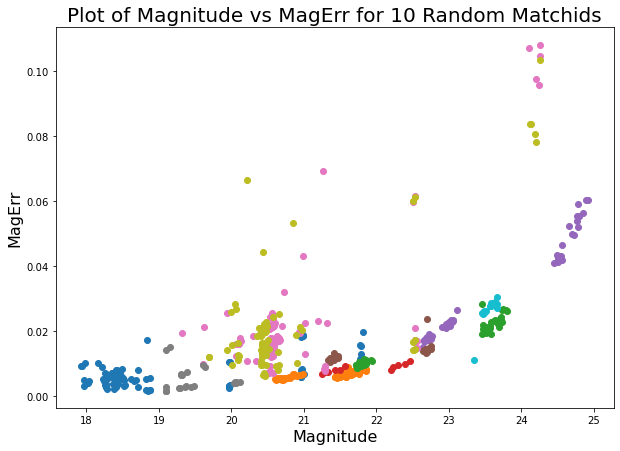

In [18]:
#plot the (mag, magerr) data for 10 objects

unique_matchids = list(df['matchid'].unique())
#lsit to hold random matchids
chosen_list = []
for i in range(0, 10):
    index = int((len(unique_matchids))*np.random.rand())
    chosen_list.append(df['matchid'][index])
    
fig = plt.figure(figsize = (10,7))
    
#now extract mag and magerr
for matchid in chosen_list:
    lightcurve_data_all, filters = get_lightcurve_data(matchid)
    #now get the sub lists all concatenated and plot
    mag_list = []
    mag_err_list = []
    for lightcurve_data in lightcurve_data_all:
        #get mag list data
        for time_mag in lightcurve_data[0]:
            mag_list.append(time_mag[1])
        for mag_err in lightcurve_data[1]:
            mag_err_list.append(mag_err)
    #print(len(mag_list))
    #print(len(mag_err_list))
    plt.scatter(mag_list, mag_err_list)
plt.title('Plot of Magnitude vs MagErr for 10 Random Matchids', fontsize=20)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('MagErr', fontsize=16)
#plt.savefig('./processed data/godzilla/mag_magerr_10.jpeg')
plt.show()

### Classifier help functions

In [82]:
def make_classified(matchid, time_mag_list, threshold_list):
    #define our classified string that holds the result of +-0 etc.
    #tuple is (time, mag)
    #by default starts with '#' to denote first point
    classified = '#'
    
    #initilize list to hold (starting t, delta t, delta m) for each character
    t_dt_dm = []
    
    #now a for loop to iterate over the (time, mag) tuples and calculate pointwise difference
    #subtract 1 so we don't try to compare the last index to an nonexistent index
    
    if len(time_mag_list) > 1:
        for i in range(len(time_mag_list)-1):
            #print(time_mag_list)
            #calculate starting time for character
            t0 = time_mag_list[i][0]
            #calculate difference in time and mag: initial mag - final mag
            dt = time_mag_list[i+1][0] - t0
            dm = time_mag_list[i][1] - time_mag_list[i+1][1]

            if abs(dm) > threshold_list[i]:
                #case 1: abs difference exceeds threshold and difference is positive, i.e. object gets brighter
                if dm > 0:
                    classified+='+'
                    
                #case 2: abs difference exceeds threshold and difference is negative, i.e. object gets dimmer
                else:
                    classified+='-'

            #case 3: abs difference does not exceed threshold and thus is labeled as 0 difference
            else:
                classified+='0'

            #append a tuple of starting time, delta t, delta mag to an event list, which we return
            t_dt_dm.append((t0, dt, dm))       
    
    #print(classified)
    #return classified string and list of (starting time, delta t, delta mag) tuples 
    return classified, t_dt_dm


#call function to take in classified string and t_dt_dm, 
#return modified classified and updated t_dt_dm if there are >=2 consecutive 0s whose mag diff exceeds the median noise of those flats
def check_flats(classified, t_dt_dm, threshold_list):
    #break apart classified into list of characters so we can change the assignments if necessary
    classified_unsewn = []
    for i in range(len(classified)):
        classified_unsewn.append(classified[i])
    
    #initilize temp variables
    t0 = 0
    dt = 0
    dm = 0
    
    #start of while loop------ 
    i=0
    while i < len(classified_unsewn):
        #print(i)
        #assign variables
        t0 = t_dt_dm[i][0]
        dt = t_dt_dm[i][1]
        dm = t_dt_dm[i][2]
        #print('i main', i)
        
        #if at final index, break
        if i>=len(classified_unsewn)-1:
            break
        
        #see if we come across a 0
        elif classified_unsewn[i]=='0':
            #start counter
            N = 1
            #now check if any consecutive 0s
            for j in range(i+1, len(classified_unsewn)):
                #print('i', i)
                #print('j', j)
                #print(len(classified_unsewn))
                if classified_unsewn[j]=='0':
                    #update
                    dt+=t_dt_dm[j][1]
                    dm+=t_dt_dm[j][2]
                    N+=1
                    
                    #need to check if this is the final element and had at least 2 hits
                    if (j==len(classified_unsewn)-1) and (N>=2):
                        #now check mag diff of initial and final
                        mag_initial = t_dt_dm[i][2]
                        mag_final = t_dt_dm[j][2]
                        #compute mag diff: a positive value means increase in brightness
                        mag_diff = mag_initial - mag_final
                        #print('mag diff', mag_diff)
                        
                        #find median noise of the flats
                        #define sublist of relevant thresholds -- goes from i to j, inclusive (want to count final 0)
                        threshold_sublist = threshold_list[i:j+1]
                        median_threshold = median(threshold_sublist)
                        #print('median threshold', median_threshold)
                        
                        #remove 0s from string; update t_dt_dm
                        for k in range(j-i+1):
                            classified_unsewn.pop(i)
                            t_dt_dm.pop(i)
                                    
                        #now check if mag diff is significant!
                        if abs(mag_diff) > median_threshold:
                            #check if pos or neg
                            #convert to flare up
                            if mag_diff > 0:
                                #append to new classified and new t_dt_dm
                                classified_unsewn.insert(i, '+')
                                t_dt_dm.insert(i, (t0, dt, dm))
                            #else: flare down
                            else:
                                #append to new classified and new t_dt_dm
                                classified_unsewn.insert(i, '-')
                                t_dt_dm.insert(i, (t0, dt, dm))
                        #else, just consolidate the 0s as one flat
                        else:
                            classified_unsewn.insert(i, '0')
                            t_dt_dm.insert(i, (t0, dt, dm))
                        #update counter to exit loop
                        i+=j-i
                        break
                             
                else:
                    #if we hit a non-zero character, see if we had >=2 flat events
                    if N>=2:
                         #now check mag diff of initial and final; the final is the last flat, so back one index
                        mag_initial = t_dt_dm[i][2]
                        mag_final = t_dt_dm[j-1][2]
                        #compute mag diff: a positive value means increase in brightness
                        mag_diff = mag_initial - mag_final
                        #print('mag diff', mag_diff)
                        
                        #find median noise of the flats
                        #define sublist of relevant thresholds -- goes from i to j-1
                        threshold_sublist = threshold_list[i:j]
                        median_threshold = median(threshold_sublist)
                        #print('threshold', median_threshold)
                        
                        #remove 0s from string; update t_dt_dm
                        #don't have j-1+1 since we don't want to remove all the way to j
                        for k in range(j-i):
                            #print(classified_unsewn[i])
                            classified_unsewn.pop(i)
                            t_dt_dm.pop(i)
                                    
                        #now check if mag diff is significant!
                        if abs(mag_diff) > median_threshold:
                            #check if pos or neg
                            #convert to flare up
                            if mag_diff > 0:
                                #append to new classified and new t_dt_dm
                                classified_unsewn.insert(i, '+')
                                t_dt_dm.insert(i, (t0, dt, dm))
                            #else: flare down
                            else:
                                #append to new classified and new t_dt_dm
                                classified_unsewn.insert(i, '-')
                                t_dt_dm.insert(i, (t0, dt, dm))
                        #else, just consolidate the 0s as one flat
                        else:
                            classified_unsewn.insert(i, '0')
                            t_dt_dm.insert(i, (t0, dt, dm))
                        #update counter
                        i+=j-i
                        break
                    #if N<2
                    else:
                        N = 0
                        #update counter
                        i+=j-i
                        break
                        
        #increment the while loop
        i+=1
    #end of while loop------   
    
    #resew classified and return it along with t_dt_dm
    classified_sewn = ''
    for c in classified_unsewn:
        classified_sewn+=c
    #print(classified_sewn)
    return classified_sewn, t_dt_dm


#given a classified string and a list of tuples of start times, delta t, delta mag 
#return a list of flare up, flare down, flat that consolidate multiple events into unique, distinct events
#and record a list of tuples of start time, total delta time, and total delta mag for each event
def consolidate_events(classified, t_dt_dm, threshold_list):
    
    #initilize lists to hold (starting time, delta time, delta mag) for each event
    flare_up_list = []
    flare_down_list = []
    flat_list = []
    
    #initilize temp variables
    t0 = 0
    dt = 0
    dm = 0
    
    #clip off starting '#'
    classified = classified.replace('#', '')
    
    #call function to take in classified string and t_dt_dm, 
    #return modified classified and updated t_dt_dm if there are >=2 consecutive 0s whose mag diff exceeds the median noise of those flats
    
    classified, t_dt_dm = check_flats(classified, t_dt_dm, threshold_list)
    
    #iterate through all characters in the string
    #use a while loop so we can update i
    i=0
    while i < len(classified):
        
        #assign variables
        t0 = t_dt_dm[i][0]
        dt = t_dt_dm[i][1]
        dm = t_dt_dm[i][2]
            
        #---------
        #first check for isolated flat event; then check up, down
        
        #isolated flat
        if classified[i] == '0':
            flat_list.append((t0, dt, dm))
        
        #flare up
        elif classified[i] == '+':
            
            #first check to see if i is the last element in the string. if so, append!
            if i==len(classified)-1:
                flare_up_list.append((t0, dt, dm))
                
            else:
                #check each of the next characters to see if we find any other matches or stops
                for j in range(i+1, len(classified)):
                    #if another up, then keep adding to event
                    if classified[j] == '+':
                        #update
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]

                        #need to check if j is the final element in list; in which case, save the values!
                        if j==len(classified)-1:
                            
                            #confirm to make sure dm > 0
                            if dm > 0:
                                flare_up_list.append((t0, dt, dm))
                            elif dm == 0:
                                flat_list.append((t0, dt, dm))
                            else:
                                flare_down_list.append((t0, dt, dm))
                            
                            #increment i by j-i
                            i+=(j-i)
                            
                            #dump temps
                            t0 = 0
                            dt = 0
                            dm = 0
                            
                            #now break
                            break
                            
                    #else, we hit any other character: i.e. - or 0
                    else:
                        #store; no updating
                        #confirm to make sure dm > 0
                        if dm > 0:
                            flare_up_list.append((t0, dt, dm))
                        elif dm == 0:
                            flat_list.append((t0, dt, dm))
                        else:
                            flare_down_list.append((t0, dt, dm))

                        #dump temps
                        t0 = 0
                        dt = 0
                        dm = 0

                        #increment i by j-i-1; this is the delta
                        i+=(j-i-1)

                        #now break out of the j for loop
                        break

        #flare down   
        else:
            
            #first check to see if i is the last element in the string. if so, append!
            if i==len(classified)-1:
                flare_down_list.append((t0, dt, dm)) 
            
            else:
                #check each of the next characters to see if we find any other matches or stops
                for j in range(i+1, len(classified)):
                    #if another down, then keep adding to event
                    if classified[j] == '-':
                        #update
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]

                        #need to check if j is the final element in list; in which case, save the values!
                        if j==len(classified)-1:
                            #confirm to make sure dm < 0
                            if dm < 0:
                                flare_down_list.append((t0, dt, dm))
                            elif dm == 0:
                                flat_list.append((t0, dt, dm))
                            else:
                                flare_up_list.append((t0, dt, dm))
                            
                            #dump temps
                            t0 = 0
                            dt = 0
                            dm = 0
                            
                            #update i by j-i: don't subtract 1, otherwise we'll end up going through the while loop one more time
                            i+=(j-i)
                            
                            #now break
                            break

                    #else, we hit anything else, i.e. + or 0
                    else:
                        #store; no updating
                        #confirm to make sure dm < 0
                        if dm < 0:
                            flare_down_list.append((t0, dt, dm))
                        elif dm == 0:
                            flat_list.append((t0, dt, dm))
                        else:
                            flare_up_list.append((t0, dt, dm))

                        #dump temps
                        t0 = 0
                        dt = 0
                        dm = 0

                        #update i by j-i-1
                        i+=(j-i-1)

                        #now break out of the j for loop
                        break

        

        #increment i
        i+=1 
    #return the populated lists!!
    return flare_up_list, flare_down_list, flat_list     

### Master classifier function

In [20]:
def master_classifier(matchid, time_mag_list, threshold_list):
   #generate classified string and list of (starting time, delta t, delta mag)
    classified, t_dt_dm = make_classified(matchid, time_mag_list, threshold_list)
    
    #call consolidate_events function to return our list of list of tuples for flare up, down, flat
    #each tuple holds the starting time of the event, the delta t, and delta mag
    flare_up_list, flare_down_list, flat_list = consolidate_events(classified, t_dt_dm, threshold_list)
    
    #return lists for each event type
    return flare_up_list, flare_down_list, flat_list
 

### Implement classifier for a given matchid -- plus fluid noise

In [21]:
'''
* this function takes a matchid and outputs master lists containing lists of the (starting time, delta T, delta mag) 
  for flare ups and downs
'''

def implement_classifier(matchid):
    
    #intialize lists to store the lists of flare up, down, flat
    master_up = []
    master_down = []
    master_flat = []
    
    #initialize list of lists of threshold data
    threshold_list_list = []
    
    #call lightcurve data
    lightcurve_data_all, unique_filter_list = get_lightcurve_data(matchid)
    
    for lightcurve_data in lightcurve_data_all:
        #time_mag tuples are stored in the 0th index
        time_mag_list = lightcurve_data[0]
        #magerr values in the 1st index
        threshold_list = lightcurve_data[1]
        
        #append treshold list to list of lists
        threshold_list_list.append(threshold_list)
        
        #call classifier function here
        #this returns a flare up, down, and flat list for a given matchid and filter
        flare_up_list, flare_down_list, flat_list = master_classifier(matchid, time_mag_list, threshold_list)
        
        #append each of these lists to their respective masters
        master_up.append(flare_up_list)
        master_down.append(flare_down_list)
        master_flat.append(flat_list)
         
    return master_up, master_down, master_flat, unique_filter_list, threshold_list_list

### Make feature vector p2 -- helper functions

In [22]:
#helper function to return the index of the tuple with the max value in the corresponding tuple index
def get_max_index_tuple(tuple_list, tuple_index, max_value):
    for i, value in enumerate(tuple_list):
        #if we reach the desired max value for the given tuple index, return the index
        if value[tuple_index] == max_value:
            return i
    #if we don't return any index through the for loop, return nan
    return 999999999

#function takes in list of lists of index, tuple corresponding to max up, max down
#and lists of master_up, master_down, master_flat
#returns the duration of flat after max flare up, before max flare down
def flat_dur_after_before_max(index_tuple_list, master_up, master_down, master_flat):
    #get indices of max max mag up, down from index_tuple_list
    up_index = index_tuple_list[0][0]
    down_index = index_tuple_list[1][0]
    
    up_tuple = index_tuple_list[0][1]
    down_tuple = index_tuple_list[1][1]
    
    #if there is no up nor down-----
    if (up_index==999999999) and (down_index==999999999):
        return 999999999
    
    #if only up, no down----
    elif (up_index!=999999999) and (down_index==999999999):
        #get list from masters corresponding to the up index
        up_list = master_up[up_index]
        flat_list = master_flat[up_index]
        
        #check if flat list is empty; if yes, then 0 duration before or after the max
        if len(flat_list)==0:
            return 0
        
        else:
            #go thru each element in up_list and flat_list and append 'up', 'max up' or 'flat' as the first element
            #of a list, second element being the tuple
            up_labeled_list = []
            for up in up_list:
                #if this tuple is not the max tuple, then just add up
                if up != up_tuple:
                    up_labeled_list.append(['up', up])
                #if it is the max tuple, add max up
                else:
                    up_labeled_list.append(['max up', up])
                
            flat_labeled_list = []
            for flat in flat_list:
                flat_labeled_list.append(['flat', flat])
                
            #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
            complete_labeled_list = up_labeled_list + flat_labeled_list
            complete_labeled_list.sort(key=lambda item: item[1][0])
            
            #check if a flat event occurs after max up
            #first find index of 'max up'
            up_sorted_index = 999999999
            for i, event in enumerate(complete_labeled_list):
                if event[0]=='max up':
                    up_sorted_index = i
            
            #check if there is a flat on right side of max up
            #if first index, only check to the right
            if up_sorted_index == 0:
                #if we find a flat to the right, return the duration (index 1 of tuple, which is index 1 within the sublist)
                if complete_labeled_list[1][0]=='flat':
                    return complete_labeled_list[1][1][1]
                else:
                    return 0
            #if index is len of list -1, then no events can follow, so return 0
            elif up_sorted_index == len(complete_labeled_list)-1:
                return 0
            #else check i+1
            else:
                '''
                print('1 up index', up_index)
                print('------')
                print('1 master up', master_up)
                print('------')
                print('1 up', up_list)
                print('------')
                print('1 up tuple', up_tuple)
                print('------')
                print('1 complete', complete_labeled_list)
                '''
                #right is flat, return right duration
                if complete_labeled_list[up_sorted_index+1][0]=='flat':
                        return complete_labeled_list[up_sorted_index+1][1][1]
                #else, no flats
                else:
                    return 0
                
    #no ups, only down    
    elif (up_index==999999999) and (down_index!=999999999):
        #get list from masters corresponding to the down index
        down_list = master_down[down_index]
        flat_list = master_flat[down_index]
        
        #check if flat list is empty; if yes, then 0 duration before down
        if len(flat_list)==0:
            return 0
        
        else:
            #go thru each element in down_list and flat_list and append 'down', 'max down' or 'flat' as the first element
            #of a list, second element being the tuple
            down_labeled_list = []
            for down in down_list:
                #if this tuple is not the max tuple, then just add down
                if down != down_tuple:
                    down_labeled_list.append(['down', down])
                #if it is the max tuple, add max down
                else:
                    down_labeled_list.append(['max down', down])
                
            flat_labeled_list = []
            for flat in flat_list:
                flat_labeled_list.append(['flat', flat])
                
            #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
            complete_labeled_list = down_labeled_list + flat_labeled_list
            complete_labeled_list.sort(key=lambda item: item[1][0])
            
            #check if a flat event occurs before or after max down
            #first find index of 'max down'
            down_sorted_index = 999999999
            for i, event in enumerate(complete_labeled_list):
                if event[0]=='max down':
                    down_sorted_index = i
            
            #check if there is a flat on either side of max down
            #if first index, there can be no events to left, so return 0
            if down_sorted_index == 0:
                return 0
            #if index is len of list -1, just check to the left
            elif down_sorted_index == len(complete_labeled_list)-1:
                if complete_labeled_list[-2][0]=='flat':
                    return complete_labeled_list[-2][1][1]
                else:
                    return 0
            #else check i-1
            else:
                #left is flat, return left duration
                if complete_labeled_list[down_sorted_index-1][0]=='flat':
                        return complete_labeled_list[down_sorted_index-1][1][1]
                #else, no flats
                else:
                    return 0
                
    #both up and down
    else:
        #print('up index', up_index)
        #print('down index', down_index)
        #check if indices match; if so, create combined sorted list of up, down, flat
        if up_index == down_index:
            up_list = master_up[up_index]
            down_list = master_down[up_index]
            flat_list = master_flat[up_index]
            #print('master up list', master_up)
            #print('up list', index_tuple_list[0])
            
            #first check if flat list is empty
            if len(flat_list) == 0:
                return 0
            
            #else, go through and populate sorted list, then check if flat between up and down or down and up
            else:
                up_labeled_list = []
                for up in up_list:
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #else, max up
                    else:
                        up_labeled_list.append(['max up', up])
                down_labeled_list = []
                for down in down_list:
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #max down
                    else:
                        down_labeled_list.append(['max down', down])
                flat_labeled_list = []
                for flat in flat_list:
                    flat_labeled_list.append(['flat', flat])
                    
                #combine up, down, flat labeled lists and then sort by start time
                complete_labeled_list = up_labeled_list + down_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])
                
                #find sorted indices
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i
                    elif event[0]=='max down':
                        down_sorted_index = i
                '''        
                print('up index', up_index)
                print('------')
                print('down index', down_index)
                print('------')
                print('master up', master_up)
                print('------')
                print('up', up_list)
                print('------')
                print('up tuple', up_tuple)
                print('------')
                print('complete', complete_labeled_list)
                '''
                
                #check if flat event occurs between max up and max down or max down and max up
                min_index = min([up_sorted_index, down_sorted_index])
                max_index = max([up_sorted_index, down_sorted_index])
                #iterate from one index beyond the min to one index prior to the max
                for i in range(min_index, max_index):
                    #if we hit a flat, save the dt
                    if complete_labeled_list[i][0]=='flat':
                        return complete_labeled_list[i][1][1]
                #return 0 if we never hit a flat
                return 0
                      
        #up, down indices don't match
        else:
            #create separate flat lists for up and down; check if flat between up and down or down and up
            up_list = master_up[up_index]
            down_list = master_down[down_index]
            flat_up_list = master_flat[up_index]
            flat_down_list = master_flat[down_index]
            
            #check if flat lists are empty
            #if both empty, then return 0
            if (len(flat_up_list)==0) and (len(flat_down_list)==0):
                return 0
            
            #no flats in down list; only check if flat follows max up
            elif (len(flat_up_list)!=0) and (len(flat_down_list)==0):
                #go thru each element in up_list and flat_list and append 'up', 'max up' or 'flat' as the first element
                #of a list, second element being the tuple
                up_labeled_list = []
                for up in up_list:
                    #if this tuple is not the max tuple, then just add up
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #if it is the max tuple, add max up
                    else:
                        up_labeled_list.append(['max up', up])

                flat_labeled_list = []
                for flat in flat_up_list:
                    flat_labeled_list.append(['flat', flat])

                #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
                complete_labeled_list = up_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])

                #check if a flat event occurs after max up
                #first find index of 'max up'
                up_sorted_index = 999999999
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i

                #check if there is a flat on right side of max up
                #if first index, only check to the right
                if up_sorted_index == 0:
                    #if we find a flat to the right, return the duration (index 1 of tuple, which is index 1 within the sublist)
                    if complete_labeled_list[1][0]=='flat':
                        return complete_labeled_list[1][1][1]
                    else:
                        return 0
                #if index is len of list -1, then no events can follow, so return 0
                elif up_sorted_index == len(complete_labeled_list)-1:
                    return 0
                #else check i+1
                else:
                    '''
                    print('2 up index', up_index)
                    print('------')
                    print('2 master up', master_up)
                    print('------')
                    print('2 up', up_list)
                    print('------')
                    print('2 up tuple', up_tuple)
                    print('------')
                    print('2 complete', complete_labeled_list)
                    '''
                    
                    #right is flat, return right duration
                    if complete_labeled_list[up_sorted_index+1][0]=='flat':
                        return complete_labeled_list[up_sorted_index+1][1][1]
                    #else, no flats
                    else:
                        return 0
            #no flats in up list; only check if flat preceds max down
            elif (len(flat_up_list)==0) and (len(flat_down_list)!=0):
                down_labeled_list = []
                for down in down_list:
                    #if this tuple is not the max tuple, then just add down
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #if it is the max tuple, add max down
                    else:
                        down_labeled_list.append(['max down', down])

                flat_labeled_list = []
                for flat in flat_down_list:
                    flat_labeled_list.append(['flat', flat])

                #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
                complete_labeled_list = down_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])

                #check if a flat event occurs before or after max down
                #first find index of 'max down'
                down_sorted_index = 999999999
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max down':
                        down_sorted_index = i

                #check if there is a flat on either side of max down
                #if first index, there can be no events to left, so return 0
                if down_sorted_index == 0:
                    return 0
                #if index is len of list -1, just check to the left
                elif down_sorted_index == len(complete_labeled_list)-1:
                    if complete_labeled_list[-2][0]=='flat':
                        return complete_labeled_list[-2][1][1]
                    else:
                        return 0
                #else check i-1 and 
                else:
                    #left is flat, return left duration
                    if complete_labeled_list[down_sorted_index-1][0]=='flat':
                            return complete_labeled_list[down_sorted_index-1][1][1]
                    #else, no flats
                    else:
                        return 0
            #flats in both up and down lists
            else:
                up_labeled_list = []
                for up in up_list:
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #else, max up
                    else:
                        up_labeled_list.append(['max up', up])
                down_labeled_list = []
                for down in down_list:
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #max down
                    else:
                        down_labeled_list.append(['max down', down])
                flat_up_labeled_list = []
                for flat in flat_up_list:
                    flat_up_labeled_list.append(['flat', flat])
                flat_down_labeled_list = []
                for flat in flat_down_list:
                    flat_down_labeled_list.append(['flat', flat])
                    
                #combine up, down, flat labeled lists and then sort by start time
                complete_labeled_list = up_labeled_list + down_labeled_list + flat_up_labeled_list + flat_down_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])
                
                #find sorted indices
                #print('master down', master_down)
                #print(down_list)
                #print(complete_labeled_list)
                #print('down list',index_tuple_list[1])
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i
                    elif event[0]=='max down':
                        down_sorted_index = i
                
                #check if flat event occurs between max up and max down or max down and max up
                min_index = min([up_sorted_index, down_sorted_index])
                max_index = max([up_sorted_index, down_sorted_index])
                #iterate from one index beyond the min to one index prior to the max
                for i in range(min_index, max_index):
                    #if we hit a flat, save the dt
                    if complete_labeled_list[i][0]=='flat':
                        return complete_labeled_list[i][1][1]
                #return 0 if we never hit a flat
                return 0
    

### Make Feature vector p2 -- classifier info. Break into electric boogaloo

In [80]:
#second part of feature vector containing classifier analysis
'''
* Max number of flare ups + filter
* Max number of flare downs + filter
* Max number of flats + filter
* Duration of max flare up, down + filters
* Delta mag of max flare up, down + filters
* max duration of flat
* Number of filters that registered at least one flare up, at least one flare down
* Total number of filters for that matchid
* Baseline for max flare up and max flare down: comparing starting and ending magnitudes
* Is there a flare up before flare down?
'''

def get_feature_vector_p2(matchid):
    
    #try:
    #first call the implement_classifier function to get our master lists
    master_up, master_down, master_flat, unique_filter_list, threshold_list_list = implement_classifier(matchid)

    #max number of flare ups
    up_nums = []
    for up_list in master_up:
        #append how many flare ups for a given filter/matchid
        up_nums.append(len(up_list))
    max_num_flare_up = max(up_nums)
    #print('up nums', up_nums)
    max_num_flare_up_index = np.argmax(up_nums)
    max_num_flare_up_filter = unique_filter_list[max_num_flare_up_index]

    #max number of flare downs
    down_nums = []
    for down_list in master_down:
        #append how many flare ups for a given filter/matchid
        down_nums.append(len(down_list))
    max_num_flare_down = max(down_nums)
    max_num_flare_down_index = np.argmax(down_nums)
    max_num_flare_down_filter = unique_filter_list[max_num_flare_down_index]

    #max number of flats
    flat_nums = []
    for flat_list in master_flat:
        flat_nums.append(len(flat_list))
    max_num_flat = max(flat_nums)
    max_num_flat_index = np.argmax(flat_nums)
    max_num_flat_filter = unique_filter_list[max_num_flat_index]

    #max flare up magnitude----------
    #first need to confirm that there is >= 1 flare up
    if max_num_flare_up >= 1:
        max_mag_up = []
        for up_list in master_up:
            #if up_list is empty, don't add any tuples
            #check to make sure we append tuples with data; else, append (0,0)
            if len(up_list) != 0:
                #we want to find the max dm, which is the third element
                max_start_time = max(up_list,key=lambda item:item[2])[0]
                max_delta_time = max(up_list,key=lambda item:item[2])[1]
                max_mag = max(up_list,key=lambda item:item[2])[2]
                max_mag_up.append((max_start_time, max_delta_time, max_mag))

            #if list len is 0, apend start time is null, delta time is null, max dm is super small so there won't be a problem when we take the max dm
            else:
                max_mag_up.append((999999999, 0, -999999999))


        #print(max_mag_up)
        #print(unique_filter_list)
        max_max_start_time_up = max(max_mag_up,key=lambda item:item[2])[0]
        max_max_delta_time_up = max(max_mag_up,key=lambda item:item[2])[1]
        max_max_mag_up = max(max_mag_up,key=lambda item:item[2])[2]

        max_max_mag_up_index = get_max_index_tuple(tuple_list = max_mag_up, tuple_index = 2, max_value = max_max_mag_up)
        #print(max_max_mag_up_index)
        max_max_mag_up_filter = unique_filter_list[max_max_mag_up_index]

    else:
        max_max_start_time_up = 999999999
        max_max_delta_time_up = 0
        max_max_mag_up = 0
        max_max_mag_up_index = 999999999
        max_max_mag_up_filter = 'NaN'


    #max flare down magnitude---------
    #list of tuples of dt, dm
    #first check to confirm there is at least 1 flare down
    if max_num_flare_down >= 1:
        max_mag_down = []
        for down_list in master_down:
            #check to make sure we append tuples with data; else, append (0,0)
            if len(down_list) != 0:

                #we want to find the max dm, which is the second element
                #because we're flaring down, there should be a negative dm
                #thus we want to calculate the minimum delta mag, as this will be the most negative
                max_start_time = min(down_list,key=lambda item:item[2])[0]
                max_delta_time = min(down_list,key=lambda item:item[2])[1]
                max_mag = min(down_list,key=lambda item:item[2])[2]
                max_mag_down.append((max_start_time, max_delta_time, max_mag))

            #if list len is 0, apend start time is null, delta time is null, max dm is super large so it won't be a problem when we take the min dm
            else:
                max_mag_down.append((999999999, 0, 999999999))

        max_max_start_time_down = min(max_mag_down,key=lambda item:item[2])[0]
        max_max_delta_time_down = min(max_mag_down,key=lambda item:item[2])[1]
        max_max_mag_down = min(max_mag_down,key=lambda item:item[2])[2]

        max_max_mag_down_index = get_max_index_tuple(tuple_list = max_mag_down, tuple_index = 2, max_value = max_max_mag_down)
        max_max_mag_down_filter = unique_filter_list[max_max_mag_down_index]
    else:
        max_max_start_time_down = 999999999
        max_max_delta_time_down = 0
        max_max_mag_down = 0
        max_max_mag_down_index = 999999999
        max_max_mag_down_filter = 'NaN'

    #duration of flat before/after max max mag up/down-----    


    #number of filters that register at least one flare up
    num_filters_up = 0
    for up_list in master_up:
        #only increment counter if there's something in the sub list
        if len(up_list) != 0:
            num_filters_up+=1

    #number of filters that register at least one flare down
    num_filters_down = 0
    for down_list in master_down:
        #only increment counter if there's something in the sub list
        if len(down_list) != 0:
            num_filters_down+=1

    #also calculate the number of unique filters to contextualize the number of up/down filters
    num_unique_filters = len(unique_filter_list)

    #baseline calculation---

    #first want to find dataframes for the matchids and the filters of the max flare up and flare down
    matchid_up_filter_df = df.loc[(df['matchid']==matchid) & (df['filter']==max_max_mag_up_filter)]
    matchid_down_filter_df = df.loc[(df['matchid']==matchid) & (df['filter']==max_max_mag_down_filter)]

    #print('max max mag down filter', max_max_mag_down_filter)

    #get threshold level
    #first check that for up and then down that the filter is not nan
    #if filter is nan, then threshold_up/down is nan

    #threshold up
    if max_max_mag_up_filter != 'NaN':
        #find threshold_list
        threshold_list = threshold_list_list[max_max_mag_up_index]
        #find median of this list; assign to threshold up
        threshold_up = median(threshold_list)
        #also save starting mag and ending mag for baseline calculation
        m0_up = matchid_up_filter_df['lightcurve_m'].values[0]
        mf_up = matchid_up_filter_df['lightcurve_m'].values[-1]

        #up baseline:
        #significant change
        if abs(m0_up - mf_up) >= threshold_up:
            baseline_up = m0_up - mf_up
        #non-significant change, so call it 0
        else:
            baseline_up = 0
    #else if the filter is NaN, i.e. no flare up at all
    else:
        threshold_up = 999999999
        baseline_up = 0

    #threshold down
    if max_max_mag_down_filter != 'NaN':
        #find threshold_list
        #find threshold_list
        threshold_list = threshold_list_list[max_max_mag_down_index]
        #find median of this list; assign to threshold up
        threshold_down = median(threshold_list)

        m0_down = matchid_down_filter_df['lightcurve_m'].values[0]
        mf_down = matchid_down_filter_df['lightcurve_m'].values[-1]

        #down baseline:
        #significant change
        if abs(m0_down - mf_down) >= threshold_down:
            baseline_down = m0_down - mf_down
        #non-significant change, so call it 0
        else:
            baseline_down = 0
    else:
        threshold_down = 999999999
        baseline_down = 0  

    #up before down-------------
    #check if start time of max max mag flare up < start time of max max mag flare down

    #first check if there is a flare up and flare down; else, false
    if (max_num_flare_up >=1) and (max_num_flare_down >=1):
        if(max_max_start_time_up < max_max_start_time_down):
            up_before_down = True
        else:
            up_before_down = False
    else:
        up_before_down = False

    #check duration of flat before max max mag down--------
    index_tuple_list = [[max_max_mag_up_index, (max_max_start_time_up, max_max_delta_time_up, max_max_mag_up)],
                        [max_max_mag_down_index, (max_max_start_time_down, max_max_delta_time_down, max_max_mag_down)]]
    duration_flat_after_before_max = flat_dur_after_before_max(index_tuple_list, master_up, master_down, master_flat)

    #return that dict
    return ({
        'threshold up': threshold_up,'threshold down': threshold_down,
        'max num flare up': max_num_flare_up, 'max num flare up filter': max_num_flare_up_filter, 'max num flare down': max_num_flare_down,
        'max num flare down filter': max_num_flare_down_filter, 'max num flat': max_num_flat, 'max num flat filter': max_num_flat_filter,
        'max max mag up': max_max_mag_up, 'max max start time up': max_max_start_time_up, 'max max delta time up': max_max_delta_time_up, 'max max mag up filter': max_max_mag_up_filter,
        'max max mag down': max_max_mag_down, 'max max start time down': max_max_start_time_down, 'max max delta time down': max_max_delta_time_down, 'max max mag down filter': max_max_mag_down_filter,
        'num filters up': num_filters_up, 'num filters down': num_filters_down, 'num unique filters': num_unique_filters,
        'baseline up': baseline_up, 'baseline down': baseline_down, 'up before down': up_before_down, 
        'duration flat after before max':duration_flat_after_before_max

    })
    '''
    #if we run into an error, give the following information below
    except:
        print('object '+str(matchid)+' had an error. printing all stats below.')
        print('------')
        print('index tuple list', index_tuple_list)
        print('------')
        print('master up', master_up)
        print('------')
        print('master down', master_down)
        print('------')
        print('master flat', master_flat)
    '''
    

### Enter the MATRIX MONSTER!!

In [24]:
#append get_feature_vector_p1 and get_feature_vector_p2 dicts columnwise to create monster vector

def frankenstein(matchid):
    feature_vector_1 = get_feature_vector_p1(matchid)
    feature_vector_2 = get_feature_vector_p2(matchid)
    
    #initialize blank dictionary to store the combined dictionaries
    monster_vector = {}
    monster_vector.update(feature_vector_1)
    monster_vector.update(feature_vector_2)
    return monster_vector

### Populate feature monster matrix

In [85]:
#define empty dict to form monster matrix
feature_vector_1_data = {'matchid': [],
 'groupid': [],
 'num other matchids in groupid': [],
 'min median mag': [],
 'max median mag': [],
 'median median mag': [],
 'min total time': [],
 'max total time': [],
 'median mad': [],
 'median chi2': [],
 'ra': [],
 'dec': [],
 'l': [],
 'b': [],
 'field name': []}

feature_vector_2_data = {'threshold up': [],
 'threshold down': [],
 'max num flare up': [],
 'max num flare up filter': [],
 'max num flare down': [],
 'max num flare down filter': [],
 'max num flat': [],
 'max num flat filter': [],
 'max max mag up': [],
 'max max start time up': [],
 'max max delta time up': [],
 'max max mag up filter': [],
 'max max mag down': [],
 'max max start time down': [],
 'max max delta time down': [],
 'max max mag down filter': [],
 'num filters up': [],
 'num filters down': [],
 'num unique filters': [],
 'baseline up': [],
 'baseline down': [],
 'up before down': [],
 'duration flat after before max': []}   

monster_matrix_data = feature_vector_1_data | feature_vector_2_data
monster_matrix_df = pd.DataFrame(monster_matrix_data)
monster_matrix_df

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max


In [26]:
#define frankenstein row for matchid 80087 (our fake TDE)
fake_tde_monster = frankenstein(80087)
fake_tde_monster

{'matchid': 80087,
 'groupid': 1033313.0,
 'num other matchids in groupid': 10,
 'min median mag': 18.299999999999997,
 'max median mag': 18.299999999999997,
 'median median mag': 18.299999999999997,
 'min total time': 68.0,
 'max total time': 68.0,
 'median mad': 999999999.0,
 'median chi2': 999999999.0,
 'ra': 197.8712822,
 'dec': -1.346418497,
 'l': 313.34978052177865,
 'b': 61.11917704189935,
 'field name': 'ABELL1689-POS3',
 'threshold up': 0.04,
 'threshold down': 0.04,
 'max num flare up': 1,
 'max num flare up filter': 'ACS_F606W',
 'max num flare down': 1,
 'max num flare down filter': 'ACS_F606W',
 'max num flat': 0,
 'max num flat filter': 'ACS_F606W',
 'max max mag up': 0.3999999999999986,
 'max max start time up': -6.0,
 'max max delta time up': 6.0,
 'max max mag up filter': 'ACS_F606W',
 'max max mag down': -3.0,
 'max max start time down': 0.0,
 'max max delta time down': 62.0,
 'max max mag down filter': 'ACS_F606W',
 'num filters up': 1,
 'num filters down': 1,
 'num 

In [86]:
#load in feature_vector_p1
feature_vector_p1 = pd.read_csv(r'./processed data/feature vector 1/feature_vector_p1.csv')
feature_vector_p1 = feature_vector_p1.iloc[:,1:]
feature_vector_p1

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,ra,dec,l,b
0,352.0,1040910.0,16056.0,25.722849,24.257601,24.990225,951.248306,1098.248669,0.200419,20.712511,269.790894,-29.248819,1.236929,-2.705975
1,857.0,1047823.0,3831.0,22.473651,21.368199,21.920925,1098.206602,1098.248981,0.039413,33.495789,269.759521,-29.325701,1.156523,-2.720425
2,875.0,1040153.0,22.0,24.167000,21.619200,21.853801,18.724074,762.985227,0.034908,127.624226,64.149673,-24.110353,221.181996,-43.970590
3,1130.0,25044.0,134.0,22.053750,22.053750,22.053750,1825.496445,1825.496445,0.173375,1298.915505,152.062317,12.302687,225.953102,49.063176
4,1708.0,1040910.0,16056.0,20.355200,19.656800,20.006000,1098.207315,1098.248866,0.035477,296.657237,269.795868,-29.207867,1.274670,-2.689401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84423,108166460.0,12611.0,7563.0,20.765100,17.852200,18.908625,579.622345,2896.252975,0.007719,7.009731,201.657333,-47.475353,309.075149,14.976194
84424,108167666.0,1040910.0,16056.0,22.442301,22.442301,22.442301,467.199597,467.199597,0.071456,25.590732,269.677094,-29.280766,1.159773,-2.635717
84425,108168307.0,1040910.0,16056.0,24.672899,23.756599,24.214749,900.407588,932.561542,0.107401,37.772892,269.755676,-29.238737,1.230403,-2.674298
84426,108168989.0,1039945.0,4529.0,20.992399,19.853150,20.229301,3.703328,3684.126813,0.049106,537.034383,84.316307,-69.266815,279.676540,-31.779546


In [87]:
#find objects than 26 mag
feature_vector_p1_ndim = feature_vector_p1.loc[feature_vector_p1['min median mag'] <= 26].reset_index()

#get unique matchids from feature_vector_p1_21
unique_matchids_fvp1_ndim = feature_vector_p1_ndim['matchid'].unique()
print('there are '+str(len(unique_matchids_fvp1_ndim))+ ' unique matchids with min median mag < 26 mag, or ' +
     str(round((len(unique_matchids_fvp1_ndim))/len(df['matchid'].unique())*100, 3))+'%')

there are 81458 unique matchids with min median mag < 26 mag, or 96.481%


In [ ]:
#populate the matrix using unique_matchids_fvp1_ndim
#log start and end time
start_time = time.time()
for i, matchid in enumerate(unique_matchids_fvp1_ndim):
    #update monster matrix
    monster_matrix_df = monster_matrix_df.append(frankenstein(matchid), ignore_index=True)
    #print progress
    percent = round((i/len(unique_matchids_fvp1_ndim))*100, 3)
    print ('progress: ' + str(percent) + '%', end="\r")
end_time = time.time()

In [83]:
get_feature_vector_p2(36777572.0)

{'threshold up': 0.023600001,
 'threshold down': 0.0775499975,
 'max num flare up': 2,
 'max num flare up filter': 'WFC3_F438W',
 'max num flare down': 1,
 'max num flare down filter': 'WFC3_F336W',
 'max num flat': 2,
 'max num flat filter': 'WFC3_F438W',
 'max max mag up': 0.13129999999999953,
 'max max start time up': 56661.12642418267,
 'max max delta time up': 168.7431289665401,
 'max max mag up filter': 'WFC3_F814W',
 'max max mag down': 0.0725990000000003,
 'max max start time down': 56653.61443527416,
 'max max delta time down': 177.33675568293984,
 'max max mag down filter': 'WFC3_F336W',
 'num filters up': 2,
 'num filters down': 1,
 'num unique filters': 3,
 'baseline up': 0.17219900000000266,
 'baseline down': 0,
 'up before down': False,
 'duration flat after before max': 0.2756018543150276}

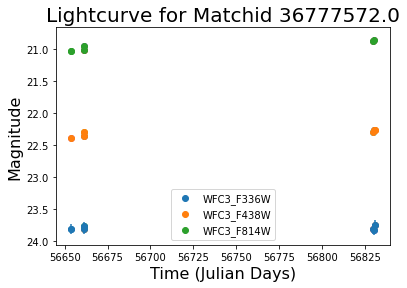

In [66]:
make_lightcurve(36777572.0)

In [24]:
print('monster matrix took '+ str((end_time - start_time)/60) + ' minutes to complete')

monster_matrix_df

monster matrix took 523.6764770507813 minutes to complete


,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,352.0,1040910.0,16056.0,25.722850,24.257601,24.990225,951.248306,1098.248669,0.200419,20.712511,...,56732.822027,125.199713,ACS_F814W,2.0,2.0,2.0,-0.365900,-0.527001,1.0,0.0
1,857.0,1047823.0,3831.0,22.473651,21.368199,21.920925,1098.206602,1098.248981,0.039413,33.495789,...,56206.656908,288.204093,WFC3_F606W,2.0,2.0,2.0,-0.151301,-0.151301,1.0,0.0
2,875.0,1040153.0,22.0,24.167000,21.619200,21.853801,18.724074,762.985227,0.034908,127.624226,...,56877.587870,1.990613,ACS_F814W,7.0,6.0,7.0,0.111300,-0.068498,1.0,0.0
3,1130.0,25044.0,134.0,22.053750,22.053750,22.053750,1825.496445,1825.496445,0.173375,1298.915505,...,53761.308997,23.361951,ACS_F814W,1.0,1.0,1.0,-0.037701,-0.037701,0.0,0.0
4,1708.0,1040910.0,16056.0,20.355200,19.656800,20.006000,1098.207315,1098.248866,0.035477,296.657237,...,56035.233907,17.695091,ACS_F814W,2.0,2.0,2.0,-0.081499,-0.081499,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81453,108166460.0,12611.0,7563.0,20.765100,17.852200,18.908625,579.622345,2896.252975,0.007719,7.009731,...,55208.735341,1.927795,WFC3_F814W,4.0,4.0,4.0,-0.009000,-0.009000,0.0,0.0
81454,108167666.0,1040910.0,16056.0,22.442301,22.442301,22.442301,467.199597,467.199597,0.071456,25.590732,...,56401.774077,398.674862,ACS_F814W,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0
81455,108168307.0,1040910.0,16056.0,24.672899,23.756599,24.214749,900.407588,932.561542,0.107401,37.772892,...,56188.453608,144.729275,ACS_F814W,2.0,2.0,2.0,0.464401,0.464401,1.0,0.0
81456,108168989.0,1039945.0,4529.0,20.992399,19.853150,20.229301,3.703328,3684.126813,0.049106,537.034383,...,56885.457731,0.786337,ACS_F606W,4.0,4.0,4.0,0.006199,0.043300,0.0,0.0


In [25]:
monster_matrix_df.to_csv('./processed data/monster/monster_matrix_godzilla.csv')

### Load in monster matrix simple to find TDEs!

In [78]:
#set cwd
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/')

In [25]:
godzilla = pd.read_csv('./processed data/godzilla/monster_matrix_godzilla.csv')
godzilla = godzilla.iloc[:,1:]
godzilla

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,352.0,1040910.0,16056.0,25.722849,24.257601,24.990225,951.248306,1098.248669,0.200419,20.712511,...,56732.822027,125.199713,ACS_F814W,2.0,2.0,2.0,-0.365900,-0.527001,1.0,0.0
1,857.0,1047823.0,3831.0,22.473651,21.368199,21.920925,1098.206602,1098.248981,0.039413,33.495789,...,56206.656908,288.204093,WFC3_F606W,2.0,2.0,2.0,-0.151301,-0.151301,1.0,0.0
2,875.0,1040153.0,22.0,24.167000,21.619200,21.853801,18.724074,762.985227,0.034908,127.624226,...,56877.587870,1.990613,ACS_F814W,7.0,6.0,7.0,0.111300,-0.068498,1.0,0.0
3,1130.0,25044.0,134.0,22.053750,22.053750,22.053750,1825.496445,1825.496445,0.173375,1298.915505,...,53761.308997,23.361951,ACS_F814W,1.0,1.0,1.0,-0.037701,-0.037701,0.0,0.0
4,1708.0,1040910.0,16056.0,20.355200,19.656800,20.006000,1098.207315,1098.248866,0.035477,296.657237,...,56035.233907,17.695091,ACS_F814W,2.0,2.0,2.0,-0.081499,-0.081499,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81453,108166460.0,12611.0,7563.0,20.765100,17.852200,18.908625,579.622345,2896.252975,0.007719,7.009731,...,55208.735341,1.927795,WFC3_F814W,4.0,4.0,4.0,-0.009000,-0.009000,0.0,0.0
81454,108167666.0,1040910.0,16056.0,22.442301,22.442301,22.442301,467.199597,467.199597,0.071456,25.590732,...,56401.774077,398.674862,ACS_F814W,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0
81455,108168307.0,1040910.0,16056.0,24.672899,23.756599,24.214749,900.407588,932.561542,0.107401,37.772892,...,56188.453608,144.729275,ACS_F814W,2.0,2.0,2.0,0.464401,0.464401,1.0,0.0
81456,108168989.0,1039945.0,4529.0,20.992399,19.853150,20.229301,3.703328,3684.126813,0.049106,537.034383,...,56885.457731,0.786337,ACS_F606W,4.0,4.0,4.0,0.006199,0.043300,0.0,0.0


In [67]:
#find field data: TARGET6, REF13, URSA-MINOR-GALAXY-4-COPY1, SN2005CF
target6 = godzilla.loc[godzilla['field name']=='TARGET6']
target6

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
21333,28267345.0,19330.0,5.0,22.506200,22.284000,22.395100,12.680642,2491.491497,0.029199,155.505674,...,52954.369370,2357.868079,ACS_F814W,2.0,2.0,2.0,-0.029798,-0.029798,1.0,0.0
26768,35354965.0,19330.0,5.0,23.212950,22.790800,23.001875,12.680642,2419.824700,0.022329,10.620835,...,55317.363821,2.324132,ACS_F814W,2.0,2.0,2.0,0.022598,0.022598,0.0,0.0
30140,39794172.0,19330.0,5.0,23.794850,23.162800,23.478825,12.680642,847.565158,0.025525,19.819832,...,55312.404724,8.819959,ACS_F606W,2.0,2.0,2.0,0.091101,-0.090799,0.0,0.0
47385,62875652.0,19330.0,5.0,24.283899,24.283899,24.283899,2491.491497,2491.491497,0.026513,4.868393,...,55317.363821,2.324132,ACS_F814W,1.0,1.0,1.0,-0.107102,-0.107102,1.0,0.0
68297,90685300.0,19330.0,5.0,25.713400,25.208599,25.460999,12.182106,2432.695557,0.037297,2.637864,...,55312.903260,10.318345,ACS_F606W,1.0,2.0,2.0,-0.118601,-0.118601,0.0,0.0
76086,100980781.0,19330.0,5.0,23.462000,23.452701,23.457351,12.680642,12.981047,0.033655,18.729403,...,55324.819162,0.399334,ACS_F814W,2.0,2.0,2.0,0.084200,0.084200,1.0,0.0


In [68]:
ref13 = godzilla.loc[godzilla['field name']=='REF13']
ref13

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
28969,38243786.0,35730.0,0.0,23.005101,22.814301,22.9902,24.091945,24.290174,0.051795,8.605695,...,55726.684305,7.919086,WFC3_F125W,3.0,3.0,3.0,0.0,0.0,0.0,0.0


In [70]:
ursa = godzilla.loc[godzilla['field name']=='URSA-MINOR-GALAXY-4-COPY-1']
ursa

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
504,621990.0,1052878.0,27.0,20.001200,19.708290,19.854745,729.187035,731.001618,0.075148,570.976097,...,50761.931063,728.314118,WFPC2_F814W,2.0,2.0,2.0,-0.234610,-0.234610,1.0,0.0
1713,2180920.0,1052878.0,27.0,23.378650,23.327391,23.353020,731.000924,731.001618,0.068811,14.958058,...,50759.311618,1.813889,WFPC2_F814W,1.0,2.0,2.0,-0.075107,-0.075107,0.0,0.0
2135,2744800.0,1052878.0,27.0,23.834450,23.655090,23.744770,731.000924,731.001618,0.079009,23.069679,...,50761.125507,3.089583,WFPC2_F814W,2.0,2.0,2.0,0.152590,0.152590,0.0,0.0
3980,5213105.0,1052878.0,27.0,24.945801,24.670500,24.808150,731.000924,731.001618,0.107481,9.057626,...,50761.931063,363.588199,WFPC2_F814W,2.0,2.0,2.0,0.224911,-0.078310,0.0,0.0
12086,16099302.0,1052878.0,27.0,22.336800,22.250700,22.293750,731.000924,731.001618,0.072506,88.281382,...,50764.215091,361.236810,WFPC2_F814W,2.0,1.0,2.0,0.215392,0.215392,0.0,0.0
20834,27625006.0,1052878.0,27.0,23.943296,23.668200,23.805748,731.000924,731.001618,0.095058,45.430562,...,50761.125507,0.805556,WFPC2_F814W,2.0,2.0,2.0,0.418711,-0.223110,0.0,0.0
24949,33001286.0,1052878.0,27.0,24.458900,24.145795,24.302348,729.187035,731.001618,0.113452,20.114997,...,50761.125507,3.089583,WFPC2_F814W,2.0,2.0,2.0,0.228710,-0.082409,0.0,0.0
27456,36233253.0,1052878.0,27.0,24.656001,24.563400,24.609700,729.187035,731.001618,0.085910,18.281160,...,50759.176896,1.007639,WFPC2_F606W,1.0,2.0,2.0,0.138790,-0.172491,0.0,0.0
27658,36516165.0,1052878.0,27.0,23.695695,23.459400,23.577548,731.000924,731.001618,0.068529,41.121417,...,50759.311618,366.207643,WFPC2_F814W,1.0,2.0,2.0,0.257110,-0.053108,0.0,0.0
27905,36858600.0,1052878.0,27.0,23.713796,23.663290,23.688543,731.000924,731.001618,0.051100,49.532632,...,50764.215091,726.030090,WFPC2_F814W,2.0,2.0,2.0,0.260493,0.260493,1.0,0.0


In [71]:
sn = godzilla.loc[godzilla['field name']=='SN2005CF']
sn

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
951,1177543.0,1027929.0,72.0,22.336500,21.675600,22.006050,99.544354,99.589383,0.138207,99.819806,...,5.644345e+04,8.777008,WFC3_F350LP,2.0,2.0,2.0,0.531900,0.055399,1.0,0.0
2242,2872685.0,1027929.0,72.0,24.566401,24.566401,24.566401,99.544354,99.544354,0.101757,17.939273,...,5.646323e+04,25.252663,WFC3_F350LP,1.0,1.0,1.0,-0.125399,-0.125399,0.0,0.0
2451,3171981.0,1027929.0,72.0,25.853950,25.853950,25.853950,76.793677,76.793677,0.183221,5.479726,...,5.644345e+04,29.153004,WFC3_F350LP,0.0,1.0,1.0,0.000000,-0.092902,0.0,0.0
6869,9001205.0,1027929.0,72.0,25.754550,25.754550,25.754550,87.248220,87.248220,0.126762,4.901067,...,5.649846e+04,21.790765,WFC3_F350LP,1.0,1.0,1.0,-0.324998,-0.324998,1.0,0.0
8797,11623305.0,1027929.0,72.0,23.279400,22.481949,22.880675,99.544354,99.589383,0.046704,19.197722,...,5.647264e+04,6.662824,WFC3_F160W,1.0,2.0,2.0,0.144899,0.144899,1.0,0.0
9629,12715357.0,1027929.0,72.0,25.525951,25.525951,25.525951,87.248220,87.248220,0.116391,4.320149,...,5.643300e+04,20.553792,WFC3_F350LP,0.0,1.0,1.0,0.000000,-0.189801,0.0,0.0
10210,13528508.0,1027929.0,72.0,25.496901,25.496901,25.496901,99.544354,99.544354,0.184922,7.949843,...,5.651015e+04,22.395382,WFC3_F350LP,1.0,1.0,1.0,0.160200,0.160200,1.0,0.0
10954,14632161.0,1027929.0,72.0,25.564901,25.564901,25.564901,99.544354,99.544354,0.134257,5.226301,...,1.000000e+09,0.000000,NaN,1.0,0.0,1.0,0.328201,0.000000,0.0,0.0
11023,14726717.0,1027929.0,72.0,23.510599,23.510599,23.510599,99.589383,99.589383,0.117841,9.316334,...,5.643298e+04,30.235267,WFC3_F160W,0.0,1.0,1.0,0.000000,0.265098,0.0,0.0
11476,15331753.0,1027929.0,72.0,25.844899,25.844899,25.844899,68.016669,68.016669,0.112274,3.272127,...,5.645223e+04,42.037038,WFC3_F350LP,1.0,1.0,1.0,0.286501,0.286501,0.0,0.0


In [31]:
#now append fake TDE!
godzilla = godzilla.append(fake_tde_monster, ignore_index=True)
godzilla

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,352.0,1040910.0,16056.0,25.722849,24.257601,24.990225,951.248306,1098.248669,2.004187e-01,2.071251e+01,...,56732.822027,125.199713,ACS_F814W,2.0,2.0,2.0,-0.365900,-0.527001,1.0,0.0
1,857.0,1047823.0,3831.0,22.473651,21.368199,21.920925,1098.206602,1098.248981,3.941257e-02,3.349579e+01,...,56206.656908,288.204093,WFC3_F606W,2.0,2.0,2.0,-0.151301,-0.151301,1.0,0.0
2,875.0,1040153.0,22.0,24.167000,21.619200,21.853801,18.724074,762.985227,3.490754e-02,1.276242e+02,...,56877.587870,1.990613,ACS_F814W,7.0,6.0,7.0,0.111300,-0.068498,1.0,0.0
3,1130.0,25044.0,134.0,22.053750,22.053750,22.053750,1825.496445,1825.496445,1.733751e-01,1.298916e+03,...,53761.308997,23.361951,ACS_F814W,1.0,1.0,1.0,-0.037701,-0.037701,0.0,0.0
4,1708.0,1040910.0,16056.0,20.355200,19.656800,20.006000,1098.207315,1098.248866,3.547654e-02,2.966572e+02,...,56035.233907,17.695091,ACS_F814W,2.0,2.0,2.0,-0.081499,-0.081499,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81454,108167666.0,1040910.0,16056.0,22.442301,22.442301,22.442301,467.199597,467.199597,7.145581e-02,2.559073e+01,...,56401.774077,398.674862,ACS_F814W,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0
81455,108168307.0,1040910.0,16056.0,24.672899,23.756599,24.214749,900.407588,932.561542,1.074015e-01,3.777289e+01,...,56188.453608,144.729275,ACS_F814W,2.0,2.0,2.0,0.464401,0.464401,1.0,0.0
81456,108168989.0,1039945.0,4529.0,20.992399,19.853150,20.229301,3.703328,3684.126813,4.910634e-02,5.370344e+02,...,56885.457731,0.786337,ACS_F606W,4.0,4.0,4.0,0.006199,0.043300,0.0,0.0
81457,108169792.0,1063416.0,7058.0,21.066900,20.106199,20.586550,747.495674,957.570447,3.964581e-02,6.061626e+01,...,56452.866856,347.603773,WFC3_F606W,2.0,2.0,2.0,-0.088702,-0.088702,1.0,0.0


### Apply restrictions to find TDEs

In [32]:
#load in annotated fields
annotated_fields = pd.read_csv('./raw data/field data/HCV_groupid_classification_annotated_complete.csv')
annotated_fields

,groupid,field name,description,keep
0,1042781,SN-M0416-IR,galaxy cluster,1.0
1,1040153,MACSJ0416.1-2403-HFFPAR,galaxy cluster,1.0
2,1084480,SN-2009IB,barred galaxy,0.0
3,360365,SN1999EM,spiral galaxy,0.0
4,1048097,NGC-1856,globular cluster,0.0
...,...,...,...,...
239,1084533,UDF_(Merged),deep field,1.0
240,331331,SN2001DU,spiral galaxy,0.0
241,483481,NGC1425,spiral galaxy,0.0
242,1075853,ERIDANUS2,dwarf galaxy,1.0


In [33]:
#helper function to plot candidates
#first set cwd
def plot_candidates(r_monster_matrix):
    #get matchids
    r_matchids = r_monster_matrix['matchid'].values

    for matchid in r_matchids:
        #find and plot the objects' lightcurves in the variable filters
        variable_filters = find_variable_filters(matchid, r_monster_matrix)
        make_lightcurve_variable_filters(matchid, variable_filters)
        
    #save r_monster_matrix as csv
    r_monster_matrix.to_csv('rf_monster_matrix.csv')
    
#helper function that takes in monster matrix and returns a filtered mm with only allowed fields
def get_field_restrictions(r_monster_matrix):
    #extract matchids and filter names; zip together into list of tuples
    matchids = r_monster_matrix['matchid'].values.tolist()
    field_names = r_monster_matrix['field name'].tolist()
    matchid_field_list = list(zip(matchids, field_names))
    
    #define empty dataframe
    mm_data = feature_vector_1_data | feature_vector_2_data
    r_field_restricted = pd.DataFrame(mm_data)
    
    #now iterate through tuples and check if keep==1 for this field
    for matchid_field in matchid_field_list:
        #find groupid for this matchid
        matchid_df = df.loc[df['matchid']==matchid_field[0]]
        groupid = matchid_df['groupid'].values[0]
        
        #locate the row with this field and groupid
        target_field_annotated = annotated_fields.loc[(annotated_fields['field name']==matchid_field[1]) & (annotated_fields['groupid']==groupid)]
        
        #check if keep==1; if yes, append this row of r_monster_matrix to the field_restricted
        #else, we don't care about it
        if target_field_annotated['keep'].values[0]==1:
            r_field_restricted = r_field_restricted.append(r_monster_matrix.loc[r_monster_matrix['matchid']==matchid_field[0]], ignore_index=True)
    
    #return the restricted matrix
    return r_field_restricted
        

In [34]:
#define list of string of restrictions to be used in candidate summary:
#zeroth index is up&down, next is up, final is down
'''
*F -- flare number condition
    *u -- up
        *i/f: min, max boundary
    *d -- down
        **i/f: min, max boundary
*D -- duration of flare
    *ui: min duration of up flare
    *uf: max duration of up flare
    *di: min duration of down flare
    *df: max duration of down flare
*DF -- duration of flat before flare down, after flare up
    *the number that follows is the max number of days for such a flat
*b -- Galactic latitude restriction
    *the number that follows is defined as the boundary in degrees of the galactic plane
'''

restrictions = ['FudD_ui3_uf20_di7_df720_DF_10_b_20', 'Fu_ui3_uf20_DF_10_b_20', 'Fd_di7_df720_DF_10_b_20']

In [35]:
#function takes in a monster matrix and returns three dataframes based on restrictions described in the function:
def find_TDE_up_down(monster_matrix):
    #restriction 1: One flare up, one flare down, up before down
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==1.0) & 
                                           (monster_matrix['max num flare down']==1.0) &
                                           (monster_matrix['up before down']==1.0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time up'] >= 3) & 
                                               (r1_monster_matrix['max max delta time up'] <= 20)) &
                                              ((r1_monster_matrix['max max delta time down'] >= 7) & 
                                               (r1_monster_matrix['max max delta time down'] <= 720))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    #restriction 5: use only allowed fields
    r5_monster_matrix = get_field_restrictions(r4_monster_matrix)
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix, r5_monster_matrix

#function finds all objects with one flare up and other restrictions
def find_TDE_up(monster_matrix):
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==1.0) & 
                                           (monster_matrix['max num flare down']==0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time up'] >= 3) & 
                                               (r1_monster_matrix['max max delta time up'] <= 20))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    #restriction 5: use only allowed fields
    r5_monster_matrix = get_field_restrictions(r4_monster_matrix)
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix, r5_monster_matrix

#function finds all objects with one flare down and other restrictions
def find_TDE_down(monster_matrix):
    #restriction 1: One flare up, one flare down, up before down
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==0.0) & 
                                           (monster_matrix['max num flare down']==1.0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time down'] >= 7) & 
                                               (r1_monster_matrix['max max delta time down'] <= 720))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    #restriction 5: use only allowed fields
    r5_monster_matrix = get_field_restrictions(r4_monster_matrix)
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix, r5_monster_matrix

In [36]:
#call find_TDE_complete on godzilla (with 80087 fake TDE)
r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix, r5_monster_matrix = find_TDE_up_down(godzilla)

In [37]:
#complete--restriction 1: 
r1_monster_matrix

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,18472.0,1039945.0,4529.0,25.013100,25.013100,25.013100,5.518444,5.518444,4.119036e-01,1.161296e+01,...,55129.060004,0.699317,WFC3_F555W,1.0,1.0,1.0,-0.316999,-0.316999,1.0,0.0
1,115726.0,1084480.0,268.0,25.588600,25.588600,25.588600,16.877598,16.877598,1.635280e-01,9.293329e+00,...,58008.025700,13.982060,WFC3_F350LP,1.0,1.0,1.0,0.173800,0.173800,1.0,0.0
2,179412.0,63563.0,102.0,22.912590,22.912590,22.912590,688.039477,688.039477,2.352542e-01,9.046221e+01,...,51096.983729,650.407533,WFPC2_F606W,1.0,1.0,1.0,-0.464901,-0.464901,1.0,0.0
3,292727.0,1037524.0,79.0,23.039001,23.039001,23.039001,1994.393665,1994.393665,2.398472e-01,2.780848e+01,...,55780.127236,875.881611,WFC3_F110W,1.0,1.0,1.0,-0.318899,-0.318899,1.0,0.0
4,408924.0,73455.0,249.0,21.832200,21.832200,21.832200,69.184927,69.184927,1.623180e-01,7.523414e+01,...,57426.974099,50.385725,WFC3_F160W,1.0,1.0,1.0,-0.281300,-0.281300,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,107985263.0,12611.0,7563.0,22.194099,22.194099,22.194099,2111.569046,2111.569046,1.866641e-01,2.420989e+01,...,55542.905586,1882.913658,WFC3_F606W,1.0,1.0,1.0,-0.310400,-0.310400,1.0,0.0
2045,108125821.0,1056946.0,584.0,25.393749,25.393749,25.393749,4001.966343,4001.966343,1.774603e-01,1.788452e+01,...,57868.107285,58.844521,ACS_F606W,1.0,1.0,1.0,-0.083198,-0.083198,1.0,0.0
2046,108157295.0,1045904.0,6492.0,22.625299,22.625299,22.625299,3602.203898,3602.203898,8.489677e-02,1.010875e+02,...,56271.580428,240.053250,ACS_F814W,1.0,1.0,1.0,-0.086500,-0.086500,1.0,0.0
2047,108164244.0,92609.0,966.0,22.853399,22.853399,22.853399,822.819829,822.819829,6.127919e-02,7.433309e+01,...,53378.985568,4.063593,ACS_F814W,1.0,1.0,1.0,-0.044700,-0.044700,1.0,0.0


In [40]:
#compelte--restriction 2:
r2_monster_matrix

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,408924.0,73455.0,249.0,21.832200,21.832200,21.832200,69.184927,69.184927,1.623180e-01,7.523414e+01,...,57426.974099,50.385725,WFC3_F160W,1.0,1.0,1.0,-0.281300,-0.281300,1.0,0.0
1,1096681.0,1041148.0,188.0,25.194799,25.194799,25.194799,68.563479,68.563479,3.238321e-01,6.054225e+01,...,53450.263283,61.701008,ACS_F814W,1.0,1.0,1.0,-0.702200,-0.702200,1.0,0.0
2,1377288.0,1045904.0,6492.0,25.182400,25.182400,25.182400,342.082475,342.082475,1.441148e-01,4.444032e+00,...,55776.976172,335.087904,ACS_F814W,1.0,1.0,1.0,-0.312000,-0.312000,1.0,0.0
3,1586102.0,1045904.0,6492.0,25.102501,23.775999,24.439250,588.352432,588.353757,6.110954e-02,5.427542e+00,...,55912.516571,585.539840,ACS_F475W,1.0,1.0,2.0,-0.110000,0.000000,1.0,0.0
4,1704228.0,1046062.0,291.0,21.037600,21.037600,21.037600,325.800144,325.800144,5.752584e-02,2.213935e+02,...,56592.141564,318.830410,ACS_F606W,1.0,1.0,1.0,-0.073301,-0.073301,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,106676231.0,1039945.0,4529.0,21.488899,21.488899,21.488899,19.124854,19.124854,2.448938e-01,2.004972e+01,...,56441.750871,11.872747,ACS_F658N,1.0,1.0,1.0,-0.169901,-0.169901,1.0,0.0
144,106830455.0,1027220.0,92.0,20.039700,20.039700,20.039700,60.251772,60.251772,1.615918e-01,7.653959e+02,...,56585.515892,52.215360,WFC3_F160W,1.0,1.0,1.0,-0.376400,-0.376400,1.0,0.0
145,106923564.0,1046062.0,291.0,21.282301,21.282301,21.282301,325.800144,325.800144,6.920339e-02,3.042349e+02,...,56592.141564,318.830410,ACS_F606W,1.0,1.0,1.0,-0.050899,-0.050899,1.0,0.0
146,106993088.0,1084480.0,268.0,25.046400,25.046400,25.046400,16.877598,16.877598,1.061108e-01,4.487945e+00,...,58011.599606,10.408154,WFC3_F350LP,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0


In [42]:
#complete--restriction 3
r3_monster_matrix

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,408924.0,73455.0,249.0,21.832200,21.832200,21.832200,69.184927,69.184927,1.623180e-01,7.523414e+01,...,57426.974099,50.385725,WFC3_F160W,1.0,1.0,1.0,-0.281300,-0.281300,1.0,0.0
1,1096681.0,1041148.0,188.0,25.194799,25.194799,25.194799,68.563479,68.563479,3.238321e-01,6.054225e+01,...,53450.263283,61.701008,ACS_F814W,1.0,1.0,1.0,-0.702200,-0.702200,1.0,0.0
2,1377288.0,1045904.0,6492.0,25.182400,25.182400,25.182400,342.082475,342.082475,1.441148e-01,4.444032e+00,...,55776.976172,335.087904,ACS_F814W,1.0,1.0,1.0,-0.312000,-0.312000,1.0,0.0
3,1586102.0,1045904.0,6492.0,25.102501,23.775999,24.439250,588.352432,588.353757,6.110954e-02,5.427542e+00,...,55912.516571,585.539840,ACS_F475W,1.0,1.0,2.0,-0.110000,0.000000,1.0,0.0
4,1704228.0,1046062.0,291.0,21.037600,21.037600,21.037600,325.800144,325.800144,5.752584e-02,2.213935e+02,...,56592.141564,318.830410,ACS_F606W,1.0,1.0,1.0,-0.073301,-0.073301,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,106676231.0,1039945.0,4529.0,21.488899,21.488899,21.488899,19.124854,19.124854,2.448938e-01,2.004972e+01,...,56441.750871,11.872747,ACS_F658N,1.0,1.0,1.0,-0.169901,-0.169901,1.0,0.0
144,106830455.0,1027220.0,92.0,20.039700,20.039700,20.039700,60.251772,60.251772,1.615918e-01,7.653959e+02,...,56585.515892,52.215360,WFC3_F160W,1.0,1.0,1.0,-0.376400,-0.376400,1.0,0.0
145,106923564.0,1046062.0,291.0,21.282301,21.282301,21.282301,325.800144,325.800144,6.920339e-02,3.042349e+02,...,56592.141564,318.830410,ACS_F606W,1.0,1.0,1.0,-0.050899,-0.050899,1.0,0.0
146,106993088.0,1084480.0,268.0,25.046400,25.046400,25.046400,16.877598,16.877598,1.061108e-01,4.487945e+00,...,58011.599606,10.408154,WFC3_F350LP,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0


In [44]:
#complete--restriction 4:
r4_monster_matrix

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,408924.0,73455.0,249.0,21.832200,21.832200,21.832200,69.184927,69.184927,1.623180e-01,7.523414e+01,...,57426.974099,50.385725,WFC3_F160W,1.0,1.0,1.0,-0.281300,-0.281300,1.0,0.0
1,1096681.0,1041148.0,188.0,25.194799,25.194799,25.194799,68.563479,68.563479,3.238321e-01,6.054225e+01,...,53450.263283,61.701008,ACS_F814W,1.0,1.0,1.0,-0.702200,-0.702200,1.0,0.0
2,1377288.0,1045904.0,6492.0,25.182400,25.182400,25.182400,342.082475,342.082475,1.441148e-01,4.444032e+00,...,55776.976172,335.087904,ACS_F814W,1.0,1.0,1.0,-0.312000,-0.312000,1.0,0.0
3,1586102.0,1045904.0,6492.0,25.102501,23.775999,24.439250,588.352432,588.353757,6.110954e-02,5.427542e+00,...,55912.516571,585.539840,ACS_F475W,1.0,1.0,2.0,-0.110000,0.000000,1.0,0.0
4,2271675.0,33701.0,913.0,22.455700,20.954200,21.060800,178.602371,178.645229,4.661095e-02,7.891212e+00,...,55704.831341,174.408817,ACS_F625W,3.0,3.0,3.0,0.029600,0.029600,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,105629083.0,1083372.0,145.0,23.155050,23.155050,23.155050,38.178011,38.178011,3.509825e-01,2.832398e+01,...,57158.283305,11.262061,WFC3_F160W,1.0,1.0,1.0,-0.771100,-0.771100,1.0,0.0
116,106276697.0,1027929.0,72.0,25.122601,25.122601,25.122601,99.544354,99.544354,1.853811e-01,1.774833e+01,...,56443.454130,21.073142,WFC3_F350LP,1.0,1.0,1.0,0.382302,0.382302,1.0,0.0
117,106676231.0,1039945.0,4529.0,21.488899,21.488899,21.488899,19.124854,19.124854,2.448938e-01,2.004972e+01,...,56441.750871,11.872747,ACS_F658N,1.0,1.0,1.0,-0.169901,-0.169901,1.0,0.0
118,106993088.0,1084480.0,268.0,25.046400,25.046400,25.046400,16.877598,16.877598,1.061108e-01,4.487945e+00,...,58011.599606,10.408154,WFC3_F350LP,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0


In [45]:
#complete--restriction 5:
r5_monster_matrix

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,36777572.0,1059852.0,80.0,23.813050,20.947399,22.295400,176.584082,177.336756,3.877489e-02,2.757114e+00,...,56661.244017,169.424726,WFC3_F438W,1.0,3.0,3.0,0.130300,0.130300,1.0,0.0
1,68866566.0,1059852.0,80.0,21.919701,21.586700,21.753200,177.336756,177.370182,1.762501e-01,6.935808e+01,...,56661.244017,169.700328,WFC3_F438W,2.0,2.0,2.0,0.063400,0.063400,1.0,0.0
2,69850190.0,439774.0,2118.0,22.157301,22.157301,22.157301,58.082060,58.082060,1.528008e-01,4.493336e+01,...,52549.913602,49.084259,WFPC2_F606W,1.0,1.0,1.0,-0.206390,-0.206390,1.0,0.0
3,72799318.0,1059852.0,80.0,23.018200,19.717949,21.069250,177.336756,177.370182,1.238160e-02,5.918057e+00,...,56661.154213,169.790131,WFC3_F438W,2.0,2.0,3.0,0.029902,0.029902,1.0,0.0
4,78729983.0,62371.0,7.0,22.580749,22.580749,22.580749,102.559759,102.559759,3.943200e-02,3.460683e+00,...,56775.360506,20.318380,WFC3_F105W,1.0,1.0,1.0,0.042101,0.042101,1.0,0.0
5,88252610.0,445976.0,11.0,25.154201,24.728350,24.941275,8.124410,12.381267,6.308495e-02,8.462354e+00,...,54025.426449,7.058935,ACS_F606W,2.0,1.0,2.0,0.253500,0.030300,1.0,0.0
6,92968767.0,1084534.0,217.0,24.666300,24.666300,24.666300,38.819781,38.819781,1.467990e-01,3.017226e+00,...,53485.658092,27.638792,ACS_F850LP,1.0,1.0,1.0,-0.368700,-0.368700,1.0,0.0
7,94170246.0,1084534.0,217.0,22.662100,22.662100,22.662100,56.079457,56.079457,3.184457e-01,2.955252e+03,...,56296.908600,50.729735,ACS_F814W,1.0,1.0,1.0,0.419500,0.419500,1.0,0.0
8,103372946.0,1059852.0,80.0,23.805099,23.805099,23.805099,177.336756,177.336756,1.378231e-01,3.112863e+00,...,56661.244017,169.700328,WFC3_F438W,1.0,1.0,1.0,0.000000,0.000000,1.0,0.0
9,106276697.0,1027929.0,72.0,25.122601,25.122601,25.122601,99.544354,99.544354,1.853811e-01,1.774833e+01,...,56443.454130,21.073142,WFC3_F350LP,1.0,1.0,1.0,0.382302,0.382302,1.0,0.0


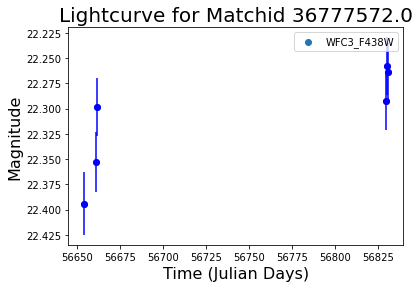

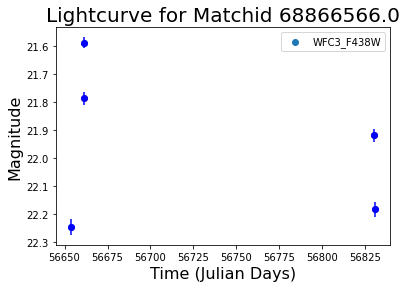

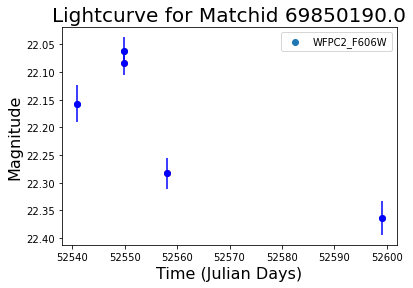

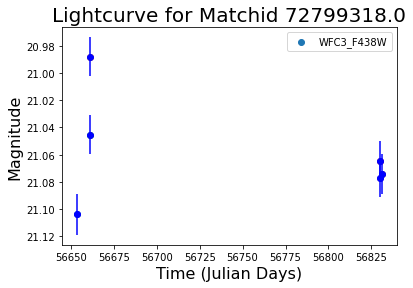

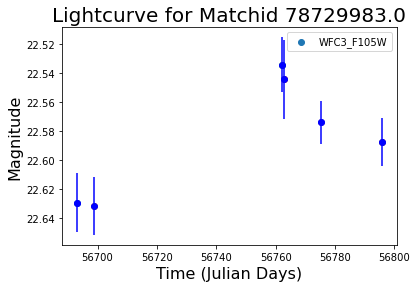

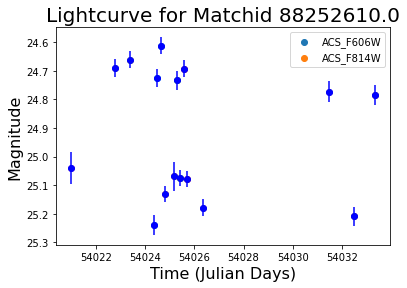

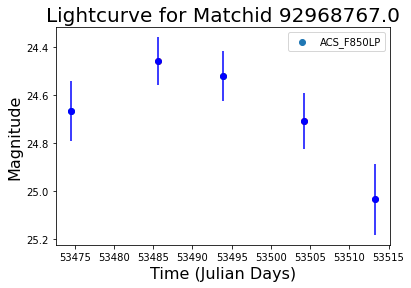

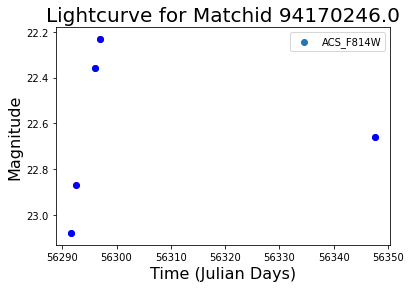

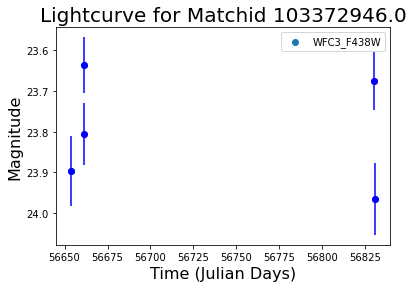

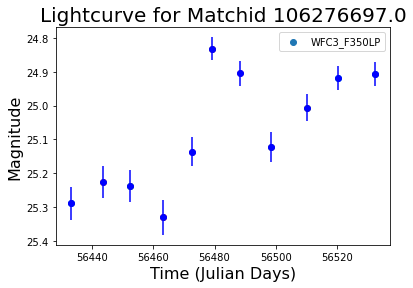

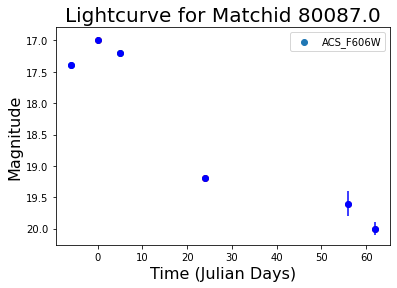

In [88]:
#plot results for complete
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/godzilla/candidates/up&down')
plot_candidates(r5_monster_matrix)

In [89]:
#call find_TDE_complete on monster_matrix_simple
r1_monster_matrix_up, r2_monster_matrix_up, r3_monster_matrix_up, r4_monster_matrix_up, r5_monster_matrix_up = find_TDE_up(godzilla)

In [90]:
#up--restriction 1:
r1_monster_matrix_up

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,10480.0,1045904.0,6492.0,22.457701,22.457701,22.457701,13.306494,13.306494,0.078466,84.376242,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.198200,0.0,0.0,0.0
1,54831.0,1045904.0,6492.0,24.276600,24.276600,24.276600,2503.406200,2503.406200,0.149005,21.110512,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.392999,0.0,0.0,0.0
2,196263.0,1045904.0,6492.0,22.008101,22.008101,22.008101,161.571062,161.571062,0.259449,2819.264517,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.828998,0.0,0.0,0.0
3,395922.0,1056946.0,584.0,25.165800,25.165800,25.165800,4075.966500,4075.966500,0.156318,17.846645,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.192101,0.0,0.0,0.0
4,438773.0,1039945.0,4529.0,24.025100,24.025100,24.025100,1100.013946,1100.013946,0.112354,12.135632,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.213499,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,107396003.0,439774.0,2118.0,19.852351,19.852351,19.852351,1171.370500,1171.370500,0.037617,595.631857,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.010899,0.0,0.0,0.0
455,107403908.0,1039945.0,4529.0,22.173700,22.173700,22.173700,1141.115499,1141.115499,0.275698,24.513051,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.821100,0.0,0.0,0.0
456,107902765.0,1056946.0,584.0,24.739200,24.739200,24.739200,4075.966500,4075.966500,0.097831,17.796877,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.000000,0.0,0.0,0.0
457,108061098.0,1045904.0,6492.0,24.151800,24.151800,24.151800,10.496476,10.496476,0.066134,4.900906,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.127100,0.0,0.0,0.0


In [91]:
#up--restriction 2:
r2_monster_matrix_up

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,10480.0,1045904.0,6492.0,22.457701,22.457701,22.457701,13.306494,13.306494,0.078466,84.376242,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.198200,0.0,0.0,0.0
1,2212218.0,1053852.0,2471.0,25.763000,25.763000,25.763000,3022.392537,3022.392537,0.313219,7.551659,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.290501,0.0,0.0,0.0
2,3808468.0,420853.0,26.0,23.761296,23.761296,23.761296,377.499774,377.499774,0.144145,22.178470,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.288190,0.0,0.0,0.0
3,4146167.0,1039945.0,4529.0,22.771649,22.771649,22.771649,1102.322471,1102.322471,0.054168,10.276078,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.151600,0.0,0.0,0.0
4,7731885.0,1053852.0,2471.0,24.572000,24.536200,24.554100,28.561772,28.561772,0.088958,3.833532,...,999999999.0,0.0,NaN,2.0,0.0,2.0,0.095400,0.0,0.0,0.0
5,9435678.0,1084480.0,268.0,23.236700,23.236700,23.236700,16.877598,16.877598,0.040394,184.910994,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.398599,0.0,0.0,0.0
6,12183266.0,1045904.0,6492.0,24.274500,24.274500,24.274500,27.187281,27.187281,0.072831,5.272906,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.155602,0.0,0.0,0.0
7,14384371.0,1084480.0,268.0,25.053101,25.053101,25.053101,16.877598,16.877598,0.188375,37.922984,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.617899,0.0,0.0,0.0
8,17405832.0,17120.0,309.0,24.991800,21.924750,23.458275,6.609868,8.312191,0.076076,35.010297,...,999999999.0,0.0,NaN,2.0,0.0,2.0,0.218100,0.0,0.0,0.0
9,17445782.0,1041148.0,188.0,25.720400,25.720400,25.720400,68.563479,68.563479,0.236148,21.854703,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.717301,0.0,0.0,0.0


In [92]:
#up--restriction 3:
r3_monster_matrix_up

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,10480.0,1045904.0,6492.0,22.457701,22.457701,22.457701,13.306494,13.306494,0.078466,84.376242,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.198200,0.0,0.0,0.0
1,2212218.0,1053852.0,2471.0,25.763000,25.763000,25.763000,3022.392537,3022.392537,0.313219,7.551659,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.290501,0.0,0.0,0.0
2,3808468.0,420853.0,26.0,23.761296,23.761296,23.761296,377.499774,377.499774,0.144145,22.178470,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.288190,0.0,0.0,0.0
3,4146167.0,1039945.0,4529.0,22.771649,22.771649,22.771649,1102.322471,1102.322471,0.054168,10.276078,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.151600,0.0,0.0,0.0
4,7731885.0,1053852.0,2471.0,24.572000,24.536200,24.554100,28.561772,28.561772,0.088958,3.833532,...,999999999.0,0.0,NaN,2.0,0.0,2.0,0.095400,0.0,0.0,0.0
5,9435678.0,1084480.0,268.0,23.236700,23.236700,23.236700,16.877598,16.877598,0.040394,184.910994,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.398599,0.0,0.0,0.0
6,12183266.0,1045904.0,6492.0,24.274500,24.274500,24.274500,27.187281,27.187281,0.072831,5.272906,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.155602,0.0,0.0,0.0
7,14384371.0,1084480.0,268.0,25.053101,25.053101,25.053101,16.877598,16.877598,0.188375,37.922984,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.617899,0.0,0.0,0.0
8,17405832.0,17120.0,309.0,24.991800,21.924750,23.458275,6.609868,8.312191,0.076076,35.010297,...,999999999.0,0.0,NaN,2.0,0.0,2.0,0.218100,0.0,0.0,0.0
9,17445782.0,1041148.0,188.0,25.720400,25.720400,25.720400,68.563479,68.563479,0.236148,21.854703,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.717301,0.0,0.0,0.0


In [93]:
#up--restriction 4:
r4_monster_matrix_up

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,10480.0,1045904.0,6492.0,22.457701,22.457701,22.457701,13.306494,13.306494,0.078466,84.376242,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.198200,0.0,0.0,0.0
1,2212218.0,1053852.0,2471.0,25.763000,25.763000,25.763000,3022.392537,3022.392537,0.313219,7.551659,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.290501,0.0,0.0,0.0
2,4146167.0,1039945.0,4529.0,22.771649,22.771649,22.771649,1102.322471,1102.322471,0.054168,10.276078,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.151600,0.0,0.0,0.0
3,7731885.0,1053852.0,2471.0,24.572000,24.536200,24.554100,28.561772,28.561772,0.088958,3.833532,...,999999999.0,0.0,NaN,2.0,0.0,2.0,0.095400,0.0,0.0,0.0
4,9435678.0,1084480.0,268.0,23.236700,23.236700,23.236700,16.877598,16.877598,0.040394,184.910994,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.398599,0.0,0.0,0.0
5,12183266.0,1045904.0,6492.0,24.274500,24.274500,24.274500,27.187281,27.187281,0.072831,5.272906,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.155602,0.0,0.0,0.0
6,14384371.0,1084480.0,268.0,25.053101,25.053101,25.053101,16.877598,16.877598,0.188375,37.922984,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.617899,0.0,0.0,0.0
7,17445782.0,1041148.0,188.0,25.720400,25.720400,25.720400,68.563479,68.563479,0.236148,21.854703,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.717301,0.0,0.0,0.0
8,19794816.0,1083372.0,145.0,24.062901,24.062901,24.062901,38.178011,38.178011,0.427639,16.234064,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.593099,0.0,0.0,0.0
9,24313281.0,1053852.0,2471.0,23.683800,23.683800,23.683800,17.244028,17.244028,0.213129,77.071004,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.576901,0.0,0.0,0.0


In [94]:
#up--restriction 5:
r5_monster_matrix_up

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,61961255.0,19400.0,17.0,23.729300,23.729300,23.729300,374.391386,374.391386,0.070400,11.462613,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.071798,0.0,0.0,0.0
1,68875002.0,1059852.0,80.0,23.489300,23.489300,23.489300,177.370182,177.370182,0.143691,240.872728,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.310999,0.0,0.0,0.0
2,78333298.0,1033838.0,117.0,21.874701,21.874701,21.874701,20.388090,20.388090,0.037932,15.932863,...,999999999.0,0.0,NaN,1.0,0.0,1.0,-0.081900,0.0,0.0,0.0
3,103818234.0,439774.0,2118.0,20.970200,20.970200,20.970200,7.957523,7.957523,0.107596,1245.261102,...,999999999.0,0.0,NaN,1.0,0.0,1.0,0.244301,0.0,0.0,0.0


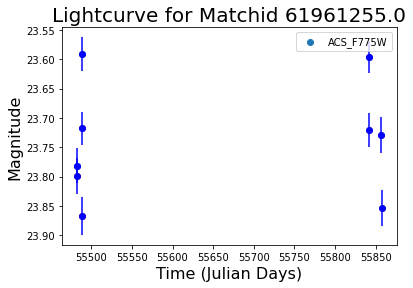

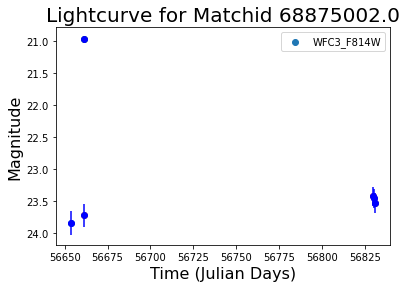

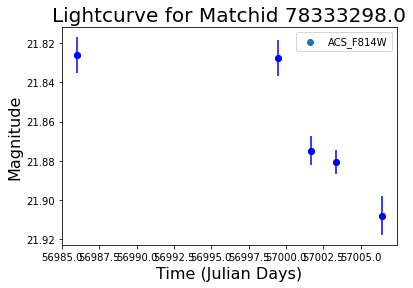

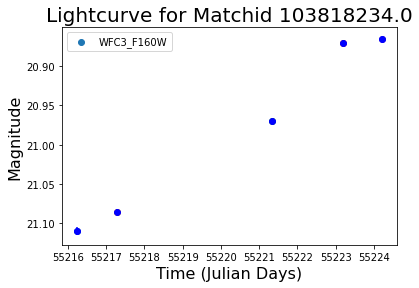

In [95]:
#plot results for flare up alone
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/godzilla/candidates/up')
plot_candidates(r5_monster_matrix_up)

In [129]:
#get classified strings for each
up_weird_matchids = [61961255.0, 68875002.0, 78333298.0]

#get list list of all filters for each matchid
weird_filters = []
lightcurve_data_all_list = []
for matchid in up_weird_matchids:
    #get lightcurve data
    lightcurve_data_all, filter_list = get_lightcurve_data(matchid)
    lightcurve_data_all_list.append(lightcurve_data_all)
    #print(matchid, lightcurve_data_all)
    #print('------')
    #get filters for each matchid
    matchid_df = df.loc[df['matchid']==matchid]
    weird_filters.append(filter_list)
#print(lightcurve_data_all_list)   
#now that we have the list of lightcurve data all, go through each lightcurve data all and then each lightcurve data
for i, lightcurve_data_all in enumerate(lightcurve_data_all_list):
    #print(lightcurve_data_all)
    for j, lightcurve_data in enumerate(lightcurve_data_all):
        #print(lightcurve_data)
        time_mag_list = lightcurve_data[0]
        threshold_list = lightcurve_data[1]
        classified, t_dt_dm = make_classified(matchid, time_mag_list, threshold_list)
        print('classified for object ' + str(up_weird_matchids[i]) + ', filter ' + str(weird_filters[i][j])+ ': ' + classified)
        flare_up_list, flare_down_list, flat_list = consolidate_events(classified, t_dt_dm, threshold_list)
        print('up list', flare_up_list)
        print('down list', flare_down_list)
        print('flat list', flat_list)
        

classified for object 61961255.0, filter ACS_F775W: #0+-++-0-
up list [(55482.75396913546, 5.860578708350658, 0.20830000000000126), (55488.74489507289, 352.76411730772816, 0.2702999999999989)]
down list [(55488.61454784381, 0.13034722907468677, -0.27590000000000003), (55841.509012380615, 0.06611107755452394, -0.12439900000000037), (55856.949093282456, 0.13013889570720494, -0.12409900000000107)]
flat list [(55482.68784654047, 0.06612259498797357, -0.018099000000002974), (55841.57512345817, 15.373969824286178, -0.007900999999996827)]
classified for object 68875002.0, filter WFC3_F814W: #0+-00
up list [(56661.12642418267, 0.10450219339691103, 2.763300000000001)]
down list [(56661.23092637607, 168.6386267731432, -2.4655000000000022)]
flat list [(56653.56107284944, 7.565351333229046, 0.1136000000000017), (56829.86955314921, 1.0617014735471457, -0.10040099999999796)]
classified for object 78333298.0, filter ACS_F814W: #0-0-
up list []
down list [(56999.43995047221, 2.2500983169302344, -0.047

In [58]:
#now for flare down only
#call find_TDE_complete on monster_matrix_simple
r1_monster_matrix_down, r2_monster_matrix_down, r3_monster_matrix_down, r4_monster_matrix_down, r5_monster_matrix_down = find_TDE_down(godzilla)

In [59]:
#down--restriction 1
r1_monster_matrix_down

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,248011.0,56487.0,511.0,23.105200,23.105200,23.105200,1.202755,1.202755,0.059519,6.853458,...,52972.017142,0.293362,ACS_F775W,0.0,1.0,1.0,0.0,0.146900,0.0,0.0
1,515553.0,1037445.0,386.0,25.200600,25.200600,25.200600,13.187432,13.187432,0.115022,6.178100,...,53730.379642,3.396560,ACS_F475W,0.0,1.0,1.0,0.0,0.146900,0.0,0.0
2,725537.0,1053852.0,2471.0,25.848900,25.153500,25.501200,4524.314387,4524.465984,0.080109,7.058699,...,52593.979554,1522.296214,ACS_F814W,0.0,2.0,2.0,0.0,0.275600,0.0,0.0
3,805426.0,92609.0,966.0,23.488199,23.488199,23.488199,822.819829,822.819829,0.060745,41.554648,...,52560.229332,819.755333,ACS_F814W,0.0,1.0,1.0,0.0,-0.066700,0.0,0.0
4,809851.0,1053852.0,2471.0,25.512500,25.512500,25.512500,4524.465984,4524.465984,0.292103,6.018895,...,52593.967621,1516.123899,ACS_F555W,0.0,1.0,1.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,107663717.0,1045904.0,6492.0,23.132299,23.132299,23.132299,570.783851,570.783851,0.086820,106.082208,...,55916.376391,13.833115,ACS_F814W,0.0,1.0,1.0,0.0,-0.275900,0.0,0.0
925,107707524.0,1045904.0,6492.0,22.045650,22.045650,22.045650,2503.406200,2503.406200,0.075813,133.296775,...,53421.949475,1642.661532,ACS_F814W,0.0,1.0,1.0,0.0,0.121399,0.0,0.0
926,107764380.0,1047823.0,3831.0,24.087200,24.087200,24.087200,780.729906,780.729906,0.185761,5.057488,...,56172.564836,297.308326,WFC3_F814W,0.0,1.0,1.0,0.0,0.484998,0.0,0.0
927,108058237.0,1043384.0,1059.0,24.591999,24.591999,24.591999,20.317396,20.317396,0.149349,76.532527,...,53442.291617,0.540858,ACS_F606W,0.0,1.0,1.0,0.0,0.727501,0.0,0.0


In [60]:
#down--restriction 2
r2_monster_matrix_down

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,866937.0,1056946.0,584.0,25.774300,25.774300,25.774300,4001.966343,4001.966343,0.226924,4.122282,...,53924.985463,59.076565,ACS_F606W,0.0,1.0,1.0,0.0,0.204601,0.0,0.0
1,872211.0,25044.0,134.0,24.210300,24.210300,24.210300,1825.496445,1825.496445,0.169989,53.363569,...,53761.308997,23.495122,ACS_F814W,0.0,1.0,1.0,0.0,0.297499,0.0,0.0
2,1176862.0,1047823.0,3831.0,22.817000,22.817000,22.817000,440.806970,440.806970,0.060194,4.977562,...,56512.421440,328.287696,WFC3_F814W,0.0,1.0,1.0,0.0,0.000000,0.0,0.0
3,1259902.0,1040910.0,16056.0,23.976700,23.976700,23.976700,891.279387,891.279387,0.160318,38.631459,...,56035.279474,32.338824,ACS_F606W,0.0,1.0,1.0,0.0,0.429300,0.0,0.0
4,1556254.0,1043384.0,1059.0,25.265400,25.265400,25.265400,47.910058,47.910058,0.143155,9.287622,...,53439.902681,22.639099,ACS_F606W,0.0,1.0,1.0,0.0,0.360000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,106290027.0,1063416.0,7058.0,25.578999,25.578999,25.578999,779.691381,779.691381,0.235248,3.073824,...,56020.646459,429.661153,WFC3_F606W,0.0,1.0,1.0,0.0,-0.470500,0.0,0.0
384,106711587.0,73455.0,249.0,23.859501,23.859501,23.859501,50.385725,50.385725,0.267874,16.879308,...,57426.974099,29.210736,WFC3_F160W,0.0,1.0,1.0,0.0,-0.877800,0.0,0.0
385,106826915.0,1045904.0,6492.0,25.902800,24.917101,25.409951,175.443772,175.445096,0.104960,4.553260,...,55960.152226,175.443772,ACS_F814W,0.0,2.0,2.0,0.0,-0.364399,0.0,0.0
386,107663717.0,1045904.0,6492.0,23.132299,23.132299,23.132299,570.783851,570.783851,0.086820,106.082208,...,55916.376391,13.833115,ACS_F814W,0.0,1.0,1.0,0.0,-0.275900,0.0,0.0


In [61]:
#down--restriction 3
r3_monster_matrix_down

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,866937.0,1056946.0,584.0,25.774300,25.774300,25.774300,4001.966343,4001.966343,0.226924,4.122282,...,53924.985463,59.076565,ACS_F606W,0.0,1.0,1.0,0.0,0.204601,0.0,0.0
1,872211.0,25044.0,134.0,24.210300,24.210300,24.210300,1825.496445,1825.496445,0.169989,53.363569,...,53761.308997,23.495122,ACS_F814W,0.0,1.0,1.0,0.0,0.297499,0.0,0.0
2,1176862.0,1047823.0,3831.0,22.817000,22.817000,22.817000,440.806970,440.806970,0.060194,4.977562,...,56512.421440,328.287696,WFC3_F814W,0.0,1.0,1.0,0.0,0.000000,0.0,0.0
3,1259902.0,1040910.0,16056.0,23.976700,23.976700,23.976700,891.279387,891.279387,0.160318,38.631459,...,56035.279474,32.338824,ACS_F606W,0.0,1.0,1.0,0.0,0.429300,0.0,0.0
4,1556254.0,1043384.0,1059.0,25.265400,25.265400,25.265400,47.910058,47.910058,0.143155,9.287622,...,53439.902681,22.639099,ACS_F606W,0.0,1.0,1.0,0.0,0.360000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,106290027.0,1063416.0,7058.0,25.578999,25.578999,25.578999,779.691381,779.691381,0.235248,3.073824,...,56020.646459,429.661153,WFC3_F606W,0.0,1.0,1.0,0.0,-0.470500,0.0,0.0
384,106711587.0,73455.0,249.0,23.859501,23.859501,23.859501,50.385725,50.385725,0.267874,16.879308,...,57426.974099,29.210736,WFC3_F160W,0.0,1.0,1.0,0.0,-0.877800,0.0,0.0
385,106826915.0,1045904.0,6492.0,25.902800,24.917101,25.409951,175.443772,175.445096,0.104960,4.553260,...,55960.152226,175.443772,ACS_F814W,0.0,2.0,2.0,0.0,-0.364399,0.0,0.0
386,107663717.0,1045904.0,6492.0,23.132299,23.132299,23.132299,570.783851,570.783851,0.086820,106.082208,...,55916.376391,13.833115,ACS_F814W,0.0,1.0,1.0,0.0,-0.275900,0.0,0.0


In [62]:
#down--restriction 4
r4_monster_matrix_down

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,866937.0,1056946.0,584.0,25.774300,25.774300,25.774300,4001.966343,4001.966343,0.226924,4.122282,...,53924.985463,59.076565,ACS_F606W,0.0,1.0,1.0,0.0,0.204601,0.0,0.0
1,872211.0,25044.0,134.0,24.210300,24.210300,24.210300,1825.496445,1825.496445,0.169989,53.363569,...,53761.308997,23.495122,ACS_F814W,0.0,1.0,1.0,0.0,0.297499,0.0,0.0
2,1556254.0,1043384.0,1059.0,25.265400,25.265400,25.265400,47.910058,47.910058,0.143155,9.287622,...,53439.902681,22.639099,ACS_F606W,0.0,1.0,1.0,0.0,0.360000,0.0,0.0
3,3979243.0,1041148.0,188.0,25.779100,25.779100,25.779100,68.563479,68.563479,0.216240,10.896554,...,53443.400812,7.861921,ACS_F814W,0.0,1.0,1.0,0.0,-0.538999,0.0,0.0
4,4030827.0,1045904.0,6492.0,22.010401,22.010401,22.010401,3330.014617,3330.014617,0.108619,619.810819,...,52939.504977,202.410503,ACS_F814W,0.0,1.0,1.0,0.0,-0.181702,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,104644956.0,1017300.0,58.0,25.860250,25.860250,25.860250,66.455904,66.455904,0.159496,3.984576,...,57363.070030,38.407617,WFC3_F350LP,0.0,1.0,1.0,0.0,-0.110100,0.0,0.0
214,104811237.0,73455.0,249.0,22.921899,22.921899,22.921899,69.184927,69.184927,0.247667,23.376012,...,57408.174897,45.042392,WFC3_F160W,0.0,1.0,1.0,0.0,0.483099,0.0,0.0
215,106711587.0,73455.0,249.0,23.859501,23.859501,23.859501,50.385725,50.385725,0.267874,16.879308,...,57426.974099,29.210736,WFC3_F160W,0.0,1.0,1.0,0.0,-0.877800,0.0,0.0
216,106826915.0,1045904.0,6492.0,25.902800,24.917101,25.409951,175.443772,175.445096,0.104960,4.553260,...,55960.152226,175.443772,ACS_F814W,0.0,2.0,2.0,0.0,-0.364399,0.0,0.0


In [63]:
#down--restriction 5
r5_monster_matrix_down

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,872211.0,25044.0,134.0,24.210300,24.210300,24.210300,1825.496445,1825.496445,0.169989,53.363569,...,53761.308997,23.495122,ACS_F814W,0.0,1.0,1.0,0.0,0.297499,0.0,0.0
1,9292156.0,1084534.0,217.0,24.150300,24.150300,24.150300,48.895003,48.895003,0.389500,38.712782,...,52734.663595,48.895003,ACS_F850LP,0.0,1.0,1.0,0.0,-1.527999,0.0,0.0
2,10531337.0,25044.0,134.0,25.368201,25.368201,25.368201,1825.496445,1825.496445,0.145968,5.566819,...,53761.308997,23.696754,ACS_F814W,0.0,1.0,1.0,0.0,-0.083401,0.0,0.0
3,11677012.0,36988.0,18.0,23.757799,23.757799,23.757799,27.477554,27.477554,0.028981,6.579385,...,53714.089243,15.757170,ACS_F814W,0.0,1.0,1.0,0.0,-0.029899,0.0,0.0
4,12715357.0,1027929.0,72.0,25.525951,25.525951,25.525951,87.248220,87.248220,0.116391,4.320149,...,56432.999586,20.553792,WFC3_F350LP,0.0,1.0,1.0,0.0,-0.189801,0.0,0.0
5,12876587.0,439774.0,2118.0,21.190500,21.190500,21.190500,1298.302473,1298.302473,0.045392,106.961159,...,52403.694293,472.315150,ACS_F606W,0.0,1.0,1.0,0.0,0.120902,0.0,0.0
6,18902419.0,439774.0,2118.0,23.118401,23.118401,23.118401,1298.302473,1298.302473,0.073149,44.199744,...,52403.694293,472.520810,ACS_F606W,0.0,1.0,1.0,0.0,-0.131300,0.0,0.0
7,19340678.0,439774.0,2118.0,21.155800,21.155800,21.155800,1298.302473,1298.302473,0.042776,104.759953,...,52403.694293,472.520810,ACS_F606W,0.0,1.0,1.0,0.0,0.097901,0.0,0.0
8,19523463.0,439774.0,2118.0,24.268800,24.268800,24.268800,3004.179065,3004.179065,0.089908,7.159870,...,52402.340939,643.526697,ACS_F606W,0.0,1.0,1.0,0.0,-0.065800,0.0,0.0
9,24281580.0,439774.0,2118.0,23.687000,23.687000,23.687000,1299.603119,1299.603119,0.073064,24.790641,...,52402.340939,258.121637,ACS_F606W,0.0,1.0,1.0,0.0,-0.322001,0.0,0.0


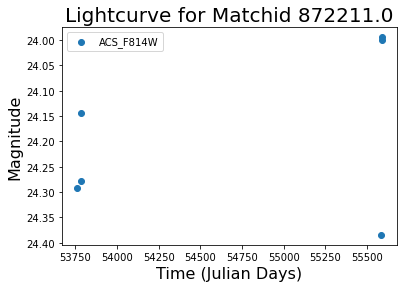

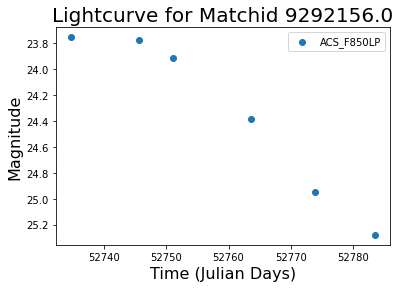

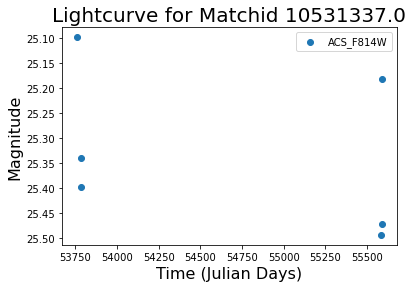

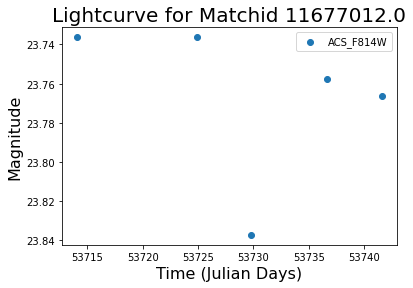

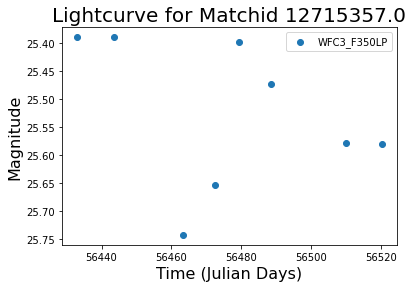

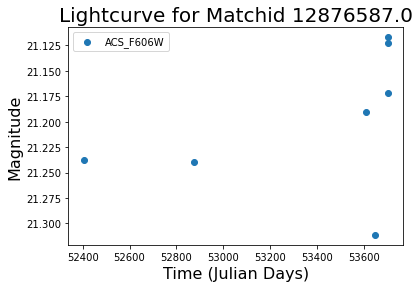

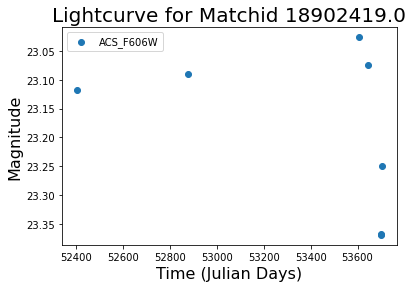

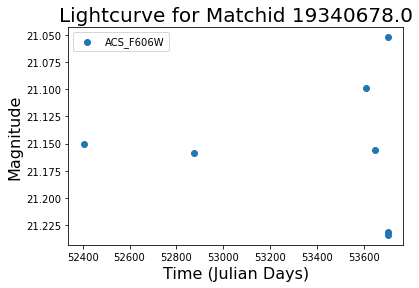

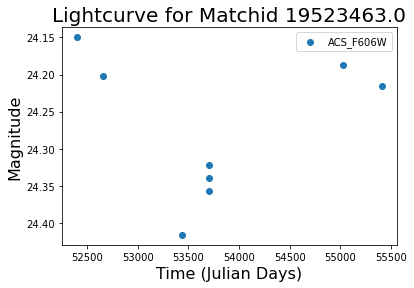

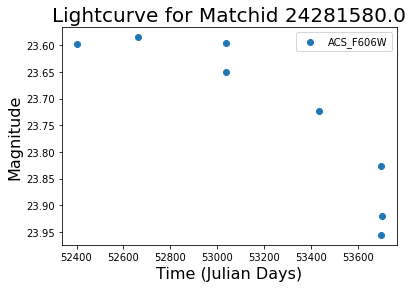

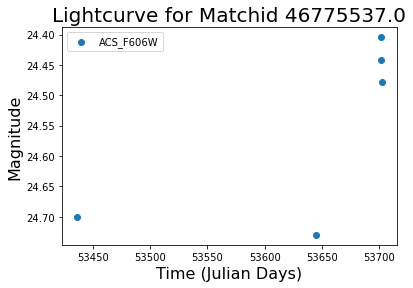

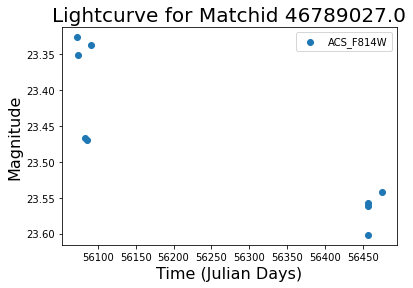

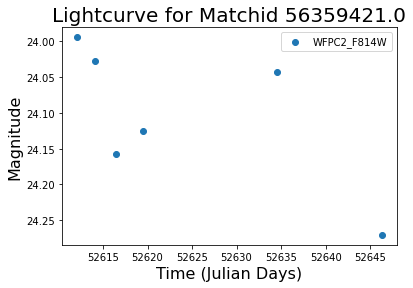

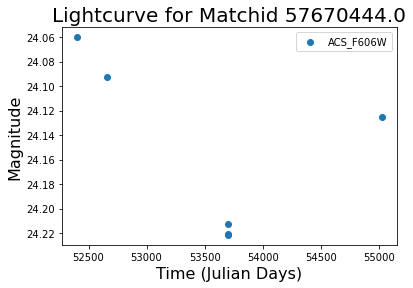

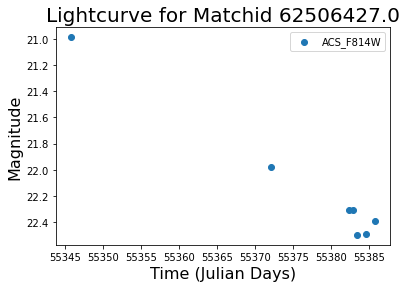

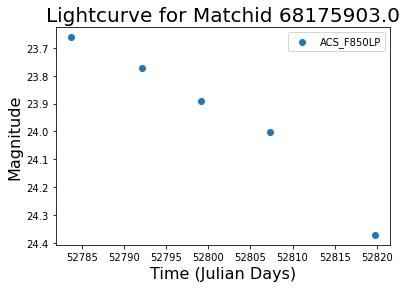

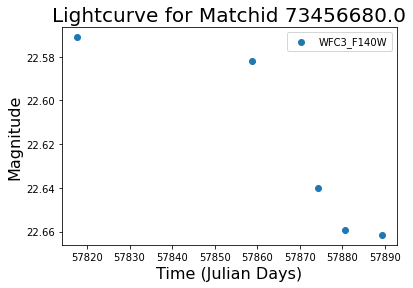

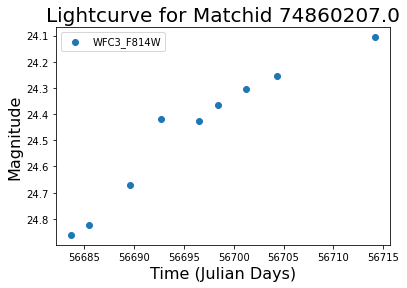

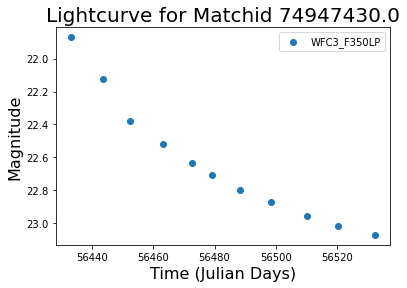

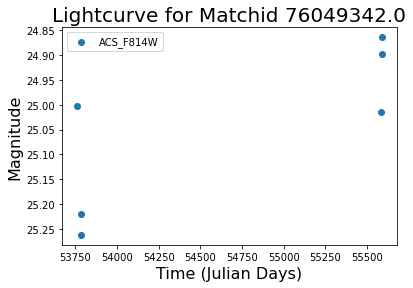

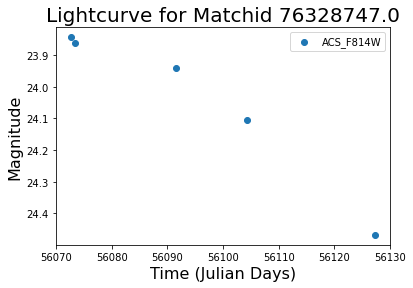

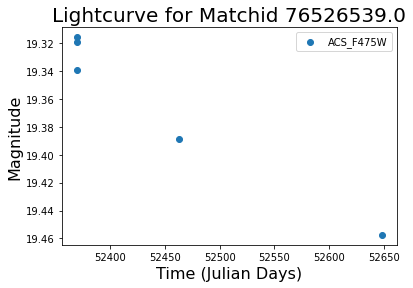

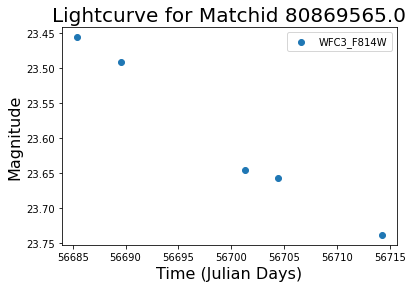

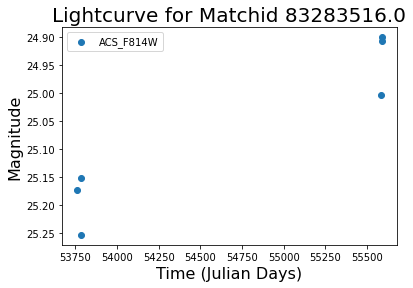

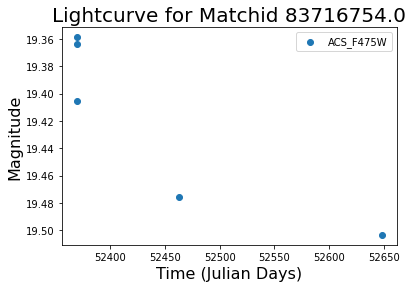

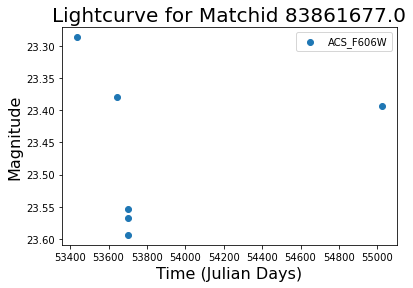

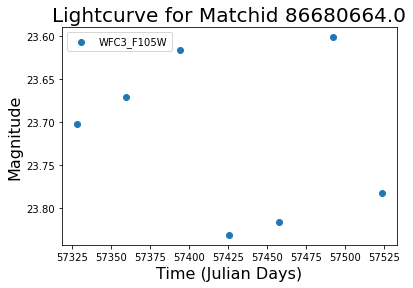

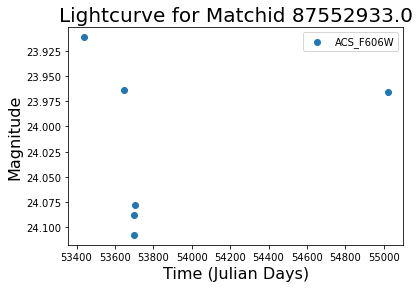

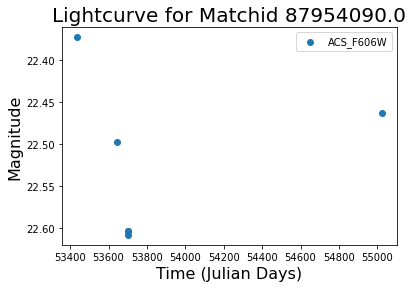

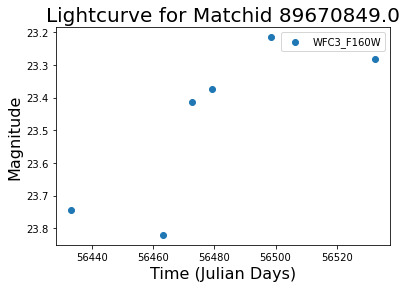

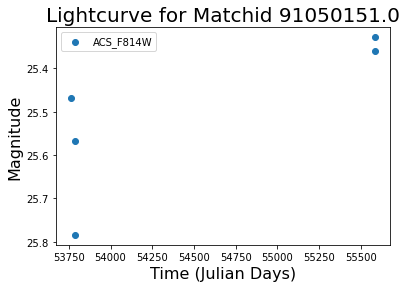

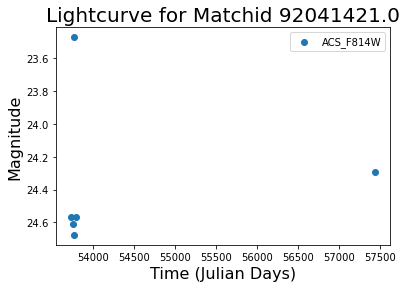

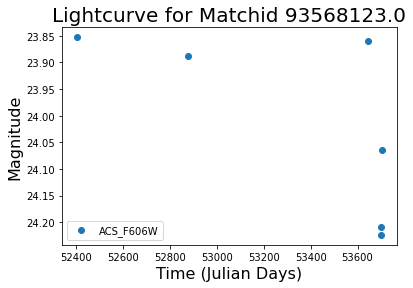

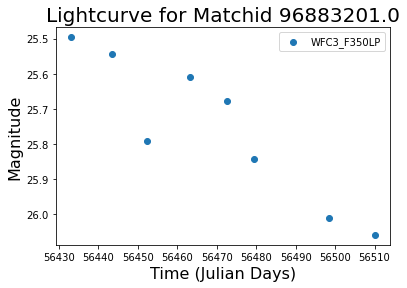

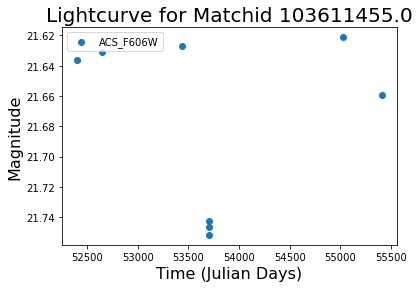

In [64]:
#plot results for flare down alone
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/godzilla/candidates/down')
plot_candidates(r5_monster_matrix_down)

### Function to return df of matchid, groupid, ra and dec, field name, search method (up&down, up, down)

In [25]:
#takes in restricted monster matrices for each of the three search methods
def get_candidate_summary(up_down_matrix, up_matrix, down_matrix):
    #define empty dataframe
    candidate_summary_data = {'matchid': [], 'groupid':[], 'max up filter': [], 'max down filter': [],
                              'ra': [], 'dec': [],'field name': [], 'search method': [], 'restrictions': [], 'noise':[]}
    candidate_summary_df = pd.DataFrame(candidate_summary_data)
    
    #set noise to be 'smooth'
    noise = 'SWEEPS_29_s'
    
    #get matchids from each matrix
    up_down_matchids = up_down_matrix['matchid'].values
    up_matchids = up_matrix['matchid'].values
    down_matchids = down_matrix['matchid'].values
    
    #iterate through each list of matchids and build up candidate summary]
    
    #loop for up&down
    for matchid in up_down_matchids:
        #get matchid_df
        matchid_df = df.loc[df['matchid']==matchid]
        matchid_monster = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==matchid]
        
        groupid = matchid_df['groupid'].values[0]
        
        up_filter = matchid_monster['max max mag up filter'].values[0]
        down_filter = matchid_monster['max max mag down filter'].values[0]
        
        ra = matchid_df['ra'].values[0]
        dec = matchid_df['dec'].values[0]
        
        field_name = find_field_matchid(matchid)
        search_method = 'up&down'
        #0th index of restrictions list corresponds to up&down
        restriction = restrictions[0]
        
        candidate_summary_df = candidate_summary_df.append({
            'matchid': matchid, 'groupid': groupid, 
            'max up filter': up_filter, 'max down filter': down_filter, 
            'ra': ra, 'dec': dec, 'field name': field_name, 
            'search method': search_method, 'restrictions': restriction,
            'noise': noise
        }, ignore_index=True)
        
    #loop for up
    for matchid in up_matchids:
        #get matchid_df
        matchid_df = df.loc[df['matchid']==matchid]
        matchid_monster = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==matchid]
        
        groupid = matchid_df['groupid'].values[0]
        
        up_filter = matchid_monster['max max mag up filter'].values[0]
        down_filter = matchid_monster['max max mag down filter'].values[0]
        
        ra = matchid_df['ra'].values[0]
        dec = matchid_df['dec'].values[0]
        
        field_name = find_field_matchid(matchid)
        search_method = 'up'
        #1st index of restrictions list corresponds to up
        restriction = restrictions[1]
        
        candidate_summary_df = candidate_summary_df.append({
            'matchid': matchid, 'groupid': groupid,
            'max up filter': up_filter, 'max down filter': down_filter,
            'ra': ra, 'dec': dec, 'field name': field_name, 
            'search method': search_method, 'restrictions': restriction,
            'noise': noise
        }, ignore_index=True)
        
    #loop for down
    for matchid in down_matchids:
        #get matchid_df
        matchid_df = df.loc[df['matchid']==matchid]
        matchid_monster = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==matchid]
        
        groupid = matchid_df['groupid'].values[0]
        
        up_filter = matchid_monster['max max mag up filter'].values[0]
        down_filter = matchid_monster['max max mag down filter'].values[0]
        
        ra = matchid_df['ra'].values[0]
        dec = matchid_df['dec'].values[0]
        
        field_name = find_field_matchid(matchid)
        search_method = 'down'
        #2nd index of restrictions list corresponds to down
        restriction = restrictions[2]
        
        candidate_summary_df = candidate_summary_df.append({
            'matchid': matchid, 'groupid': groupid,
            'max up filter': up_filter, 'max down filter': down_filter,
            'ra': ra, 'dec': dec, 'field name': field_name, 
            'search method': search_method, 'restrictions': restriction,
            'noise': noise
        }, ignore_index=True)
        
    return candidate_summary_df

### Get Summary!

In [26]:
candidate_summary_df = get_candidate_summary(r4_monster_matrix_smooth, r4_monster_matrix_smooth_up, r4_monster_matrix_smooth_down)
candidate_summary_df

,matchid,groupid,max up filter,max down filter,ra,dec,field name,search method,restrictions,noise
0,2868762.0,1059852.0,WFC3_F814W,WFC3_F814W,40.033421,-34.539127,FORNAX-CLUSTER4,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
1,7245007.0,1045904.0,ACS_F814W,ACS_F814W,11.378880,41.830376,M31,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
2,8115288.0,1045904.0,ACS_F814W,ACS_F814W,11.395127,41.582535,M31,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
3,16937845.0,33701.0,WFC3_F814W,WFC3_F814W,287.736359,-59.974052,PSR-J1911-5958A,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
4,21035925.0,1045904.0,ACS_F814W,ACS_F814W,11.022468,41.280289,M31,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
...,...,...,...,...,...,...,...,...,...,...
171,103303019.0,1041148.0,NaN,ACS_F814W,162.097916,12.646221,NGC3384-POS-W,down,Fd_di20_df720_DF_10_b_20,SWEEPS_29_s
172,105621493.0,1041148.0,NaN,ACS_F814W,162.085251,12.664583,NGC3384-POS-W,down,Fd_di20_df720_DF_10_b_20,SWEEPS_29_s
173,105795226.0,1041148.0,NaN,ACS_F814W,162.125977,12.651401,NGC3384-POS-W,down,Fd_di20_df720_DF_10_b_20,SWEEPS_29_s
174,106348073.0,33004.0,NaN,WFC3_F814W,78.511978,-40.043541,NGC1851,down,Fd_di20_df720_DF_10_b_20,SWEEPS_29_s


In [76]:
#save that puppy!
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin')
candidate_summary_df.to_csv('./processed data/sweeps/r4/sweeps_smooth_candidate_summary_correct.csv')

In [78]:
#find unique fields in summary
candidate_summary_df['field name'].unique()

array(['FORNAX-CLUSTER4', 'M31', 'PSR-J1911-5958A', ' NGC3370-ACS',
       'cosmos', 'UGC-07356', 'M101-A', 'M31-B379', 'STAR-0537-6910',
       'NGC5584', 'SN-2012Z', 'FIELD-140801-1126H', 'ANY',
       'ABELL1689-POS3', 'NGC3384-POS-W', 'M5', 'NGC3377-NUC1',
       'ABELL-370-HFFPAR', 'NGC104-WFC-UPDATE', 'NGC1851', 'HDF_(Merged)',
       'SN-M0416-IR', 'NGC-1856', 'NGC3021-ACS'], dtype=object)

### Select only those candidates in allowed fields

In [28]:
allowed_fields = ['FORNAX-CLUSTER4', 'Cosmos', 'FIELD-140801-1126H',  'ANY', 
                  'ABELL1689-POS3', 'NGC3377-NUC1', 'ABELL-370-HFFPAR', 'HDF_(Merged)', 'SN-M0416-IR']

#iterate through candidate summary df and save only those rows that correspond to these fields
field_candidates_df = candidate_summary_df.loc[candidate_summary_df['field name']==allowed_fields[0]].reset_index()
for i in range(1, len(allowed_fields)):
    field_candidates_df = field_candidates_df.append(candidate_summary_df.loc[candidate_summary_df['field name']==allowed_fields[i]],
                                                    ignore_index=True)
#remove first index
field_candidates_df = field_candidates_df.iloc[:,1:]
field_candidates_df

,matchid,groupid,max up filter,max down filter,ra,dec,field name,search method,restrictions,noise
0,2868762.0,1059852.0,WFC3_F814W,WFC3_F814W,40.033421,-34.539127,FORNAX-CLUSTER4,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
1,63916004.0,1059852.0,WFC3_F814W,WFC3_F814W,40.048920,-34.539162,FORNAX-CLUSTER4,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
2,68866566.0,1059852.0,WFC3_F814W,WFC3_F814W,40.033699,-34.536140,FORNAX-CLUSTER4,up&down,FudD_ui7_uf20_di20_df720_DF_10_b_20,SWEEPS_29_s
3,3660442.0,1059852.0,NaN,WFC3_F814W,40.045818,-34.547409,FORNAX-CLUSTER4,down,Fd_di20_df720_DF_10_b_20,SWEEPS_29_s
4,60004320.0,37745.0,ACS_F606W,NaN,212.016647,-11.352072,FIELD-140801-1126H,up,Fu_ui7_uf20_DF_10_b_20,SWEEPS_29_s
5,88503293.0,37745.0,ACS_F606W,NaN,211.968964,-11.283259,FIELD-140801-1126H,up,Fu_ui7_uf20_DF_10_b_20,SWEEPS_29_s
6,76901711.0,1039468.0,ACS_F814W,NaN,195.474686,27.830599,ANY,up,Fu_ui7_uf20_DF_10_b_20,SWEEPS_29_s
7,92009869.0,1074339.0,NaN,ACS_F606W,189.985535,-11.436307,ANY,down,Fd_di20_df720_DF_10_b_20,SWEEPS_29_s
8,81641811.0,1033313.0,ACS_F814W,NaN,197.840393,-1.353533,ABELL1689-POS3,up,Fu_ui7_uf20_DF_10_b_20,SWEEPS_29_s
9,31297076.0,27681.0,NaN,ACS_F606W,161.959900,13.940643,NGC3377-NUC1,down,Fd_di20_df720_DF_10_b_20,SWEEPS_29_s


In [55]:
#save that puppy!
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin')
field_candidates_df.to_csv('./processed data/sweeps/r4/sweeps_smooth_candidate_summary_field_restricted.csv')

In [43]:
#export images and save a monster matrix of these candidates
candidate_matchids = field_candidates_df['matchid'].unique()

#populate monster matrix
field_candidates_monster_matrix = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==candidate_matchids[0]].reset_index()
for i in range(1, len(candidate_matchids)):
    field_candidates_monster_matrix = field_candidates_monster_matrix.append(
          monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==candidate_matchids[i]], ignore_index=True
     ) 
#remove old indices
field_candidates_monster_matrix = field_candidates_monster_matrix.iloc[:,1:]
field_candidates_monster_matrix

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max start time down,max max delta time down,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max
0,2868762,1059852,80,23.245251,21.462999,21.697501,176.584082,177.336756,0.226616,49.950226,...,56661.12642,168.743129,WFC3_F814W,1,1,1,-0.194700,-0.194700,1,0.000000
1,63916004,1059852,80,24.147299,21.323500,22.491300,177.336756,177.370182,0.018812,0.842674,...,56661.12642,168.743129,WFC3_F814W,1,1,1,-0.190500,-0.190500,1,0.000000
2,68866566,1059852,80,21.919701,21.586700,21.753200,177.336756,177.370182,0.176250,69.358084,...,56661.23093,169.700328,WFC3_F814W,1,1,1,0.000000,0.000000,1,0.000000
3,3660442,1059852,80,21.337700,19.783701,20.560700,177.336756,177.370182,0.057816,47.204696,...,56661.12642,169.018731,WFC3_F814W,0,1,1,0.000000,-0.227999,0,7.565351
4,60004320,37745,10,21.009801,21.009801,21.009801,12.542425,12.542425,0.040093,503.922951,...,99999.00000,0.000000,NaN,1,0,1,0.075800,0.000000,0,1.977824
5,88503293,37745,10,21.551500,21.551500,21.551500,12.188871,12.188871,0.028574,128.025174,...,99999.00000,0.000000,NaN,1,0,1,0.045800,0.000000,0,2.155428
6,76901711,1039468,13,24.464199,24.378401,24.456600,30.734063,30.736112,0.014169,82.313697,...,99999.00000,0.000000,NaN,1,0,2,0.741501,0.000000,0,0.000000
7,92009869,1074339,3,26.670601,26.670601,26.670601,25.703496,25.703496,0.178328,7.709151,...,57527.59190,22.697258,ACS_F606W,0,1,1,0.000000,-0.441200,0,0.927789
8,81641811,1033313,9,23.749600,23.749600,23.749600,40.010701,40.010701,0.035379,8.943919,...,99999.00000,0.000000,NaN,1,0,1,0.000000,0.000000,0,3.462362
9,31297076,27681,12,26.655300,26.655300,26.655300,31.864155,31.864155,0.087877,8.925664,...,53085.80292,31.264416,ACS_F606W,0,1,1,0.000000,-0.389299,0,0.199959


In [46]:
#sset cwd
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin')

In [47]:
#save new monster!
field_candidates_monster_matrix.to_csv('./processed data/sweeps/r4/candidate_field_restricted_mm.csv')

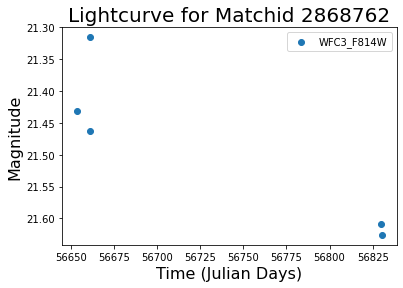

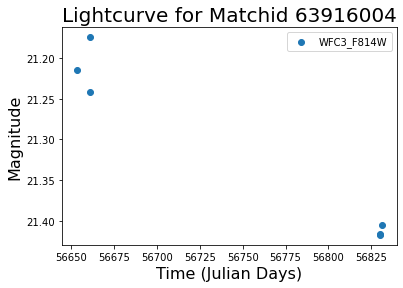

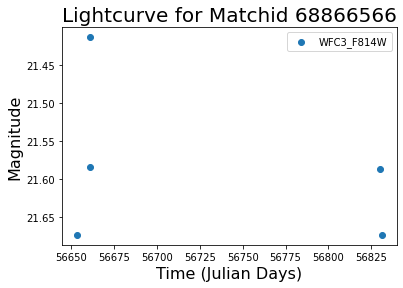

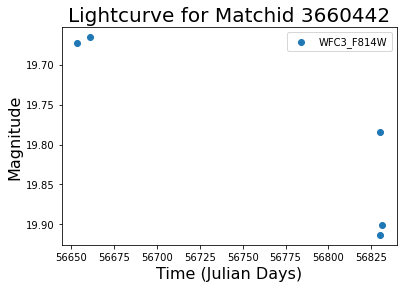

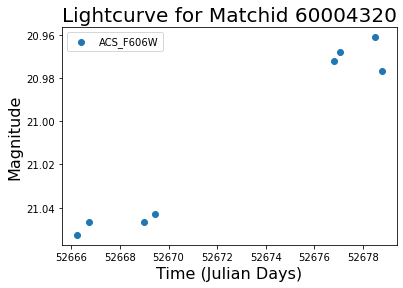

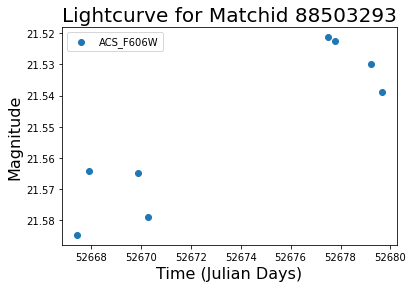

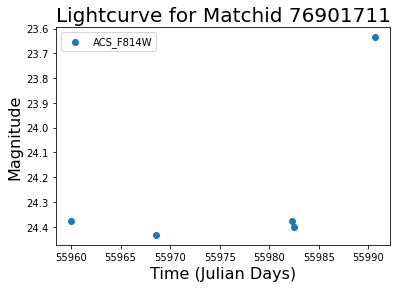

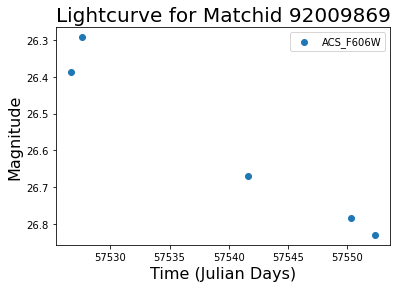

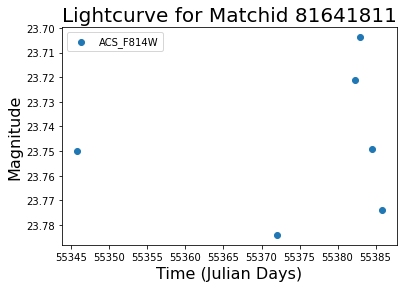

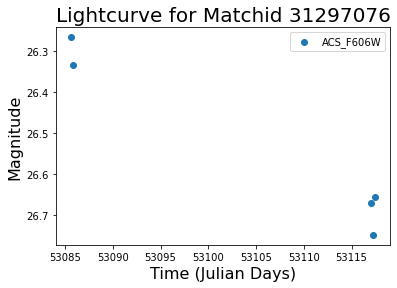

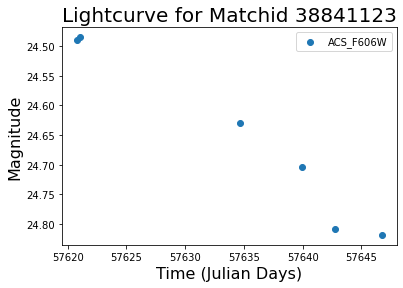

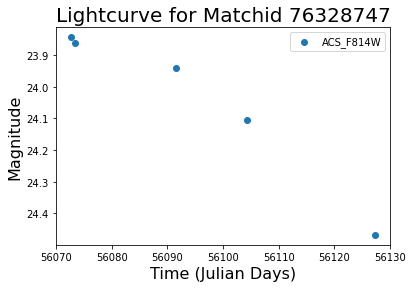

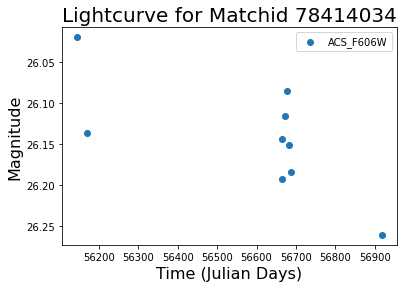

In [52]:
#plot images!!
#first change cwd
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/sweeps/r4/field restricted/lightcurves')
plot_candidates(field_candidates_monster_matrix)